Comprehensive Autoimmune Disorder Dataset _ Exploratory Data Analysis

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/abdullahragheb/all_autoimmune_disorder_10k/data

In [19]:
#libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)  # Wyświetla wszystkie kolumny


Data aquisition form database

In [20]:
# connection to database
db_name = '../database/db_autoimmune_disorders_new_16012025.db'
conn = sqlite3.connect(db_name)

# import data to DataFrame
query = "SELECT t.*,d.* FROM tbl_all_research_results t LEFT JOIN tbl_disorders_description d ON t.Diagnosis = d.Diseases_eng;"
df= pd.read_sql_query(query, conn)

# close connection
conn.close()

Checking data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            13812 non-null  int64  
 1   Age                                   13812 non-null  int64  
 2   Gender                                13812 non-null  object 
 3   Diagnosis                             13812 non-null  object 
 4   Sickness_Duration_Months              13812 non-null  int64  
 5   RBC_Count                             13812 non-null  float64
 6   Hemoglobin                            13812 non-null  float64
 7   Hematocrit                            13812 non-null  float64
 8   MCV                                   13812 non-null  float64
 9   MCH                                   13812 non-null  float64
 10  MCHC                                  13812 non-null  float64
 11  RDW            

In [6]:
# drop from df diseases group column Thyroid and Endocrine Diseases, Vascular Diseases, Kidney and Urinary Diseases, Miscellaneous
#df = df.drop(df[df['Diseases_group'].isin(['Kidney and Urinary Diseases','Miscellaneous','Thyroid and Endocrine Diseases','Vascular Diseases'])].index)

First look at the dataset to check if data types are correct

In [22]:
df.head() 

Patient_ID  Age  Gender            Diagnosis  Sickness_Duration_Months  \
0           1   62    Male  Autoimmune orchitis                        41   
1           2   54  Female  Autoimmune orchitis                        41   
2           3   34    Male  Autoimmune orchitis                        86   
3           4   22    Male  Autoimmune orchitis                        43   
4           5   20  Female  Autoimmune orchitis                        50   

   RBC_Count  Hemoglobin  Hematocrit     MCV    MCH   MCHC    RDW  \
0       4.75       13.37       43.11  101.91  28.41  34.98  12.12   
1       4.32       10.76       39.92   95.96  28.22  31.70  12.89   
2       4.42       11.91       38.38   80.56  28.40  35.21  12.73   
3       4.33       12.72       39.99   84.71  26.67  31.25  14.62   
4       3.99       11.07       43.58   89.87  30.64  32.77  14.45   

   Reticulocyte_Count  WBC_Count  Neutrophils  Lymphocytes  Monocytes  \
0                2.77     4458.0        40.05        34.54       3.29   
1                2.98     4974.0        32.30        17.21       2.11   
2                1.35     8766.0        32.30        20.94       5.81   
3                1.63     8828.0        34.62        25.83       3.30   
4                2.12     4583.0        56.56        42.86       7.51   

   Eosinophils  Basophils  PLT_Count    MPV  ANA      Esbach  MBL_Level  \
0         4.42       0.83   402793.0   8.45    1  154.915372       0.71   
1         4.24       1.44   145389.0   7.22    0  447.570310       1.58   
2         4.53       1.33   111764.0  11.63    0  236.292853       1.18   
3         2.30       0.81   276336.0   8.40    1  239.695961       0.95   
4         2.30       1.24   297272.0   9.73    0  466.374954       1.37   

         ESR         C3        C4        CRP  AntidsDNA  AntiSm  \
0  21.470329  14.274072  8.281658  29.182553        1.0     0.0   
1  31.601330   2.083559  6.555046  22.356969        1.0     1.0   
2  27.346259  73.459310  6.957688  24.933347        0.0     1.0   
3  23.728429  67.439371  4.355488  46.448538        1.0     0.0   
4  30.440890  54.250929  7.824894  45.904132        1.0     0.0   

   Rheumatoid_factor  ACPA  Anti_TPO  Anti_Tg  Anti_SMA  Low_grade_fever  \
0                1.0   1.0       1.0      0.0       0.0                0   
1                0.0   0.0       1.0      1.0       0.0                1   
2                0.0   1.0       1.0      0.0       0.0                1   
3                1.0   1.0       0.0      0.0       0.0                0   
4                0.0   1.0       1.0      1.0       0.0                0   

   Fatigue_or_chronic_tiredness  Dizziness  Weight_loss  \
0                             1          0            0   
1                             0          1            0   
2                             0          0            1   
3                             1          0            1   
4                             1          1            1   

   Rashes_and_skin_lesions  Stiffness_in_the_joints  \
0                        1                        0   
1                        1                        1   
2                        1                        1   
3                        0                        0   
4                        1                        0   

   Brittle_hair_or_hair_loss  Dry_eyes_and_or_mouth  General_unwell_feeling  \
0                          1                      1                       1   
1                          1                      1                       0   
2                          0                      1                       1   
3                          1                      0                       0   
4                          1                      0                       1   

   Joint_pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           0           0                           0          0         0   
1           1           0                           0     

In [23]:
df.tail()

Patient_ID  Age  Gender Diagnosis  Sickness_Duration_Months  RBC_Count  \
13807       13808   30  Female    Normal                        76   4.369449   
13808       13809   78    Male    Normal                        34   5.104874   
13809       13810   33    Male    Normal                        56   5.840766   
13810       13811   37  Female    Normal                       110   5.197375   
13811       13812   73    Male    Normal                       112   5.986583   

       Hemoglobin  Hematocrit        MCV        MCH       MCHC        RDW  \
13807   12.616547   40.702933  99.409783  29.852514  34.203124  13.359379   
13808   14.749487   42.749227  97.561459  30.820043  33.599254  13.675515   
13809   16.979142   47.139018  80.555161  28.324916  33.767540  11.700203   
13810   14.351748   42.746795  80.760921  28.409289  33.707538  13.614987   
13811   15.815299   42.444557  83.665471  31.380579  35.329164  12.416254   

       Reticulocyte_Count    WBC_Count  Neutrophils  Lymphocytes  Monocytes  \
13807            2.088784  8806.024834    49.523295    20.934829   4.465081   
13808            1.240863  8443.692777    41.880247    29.889194   7.375775   
13809            2.195858  7611.540308    45.271574    38.572941   5.302781   
13810            2.075076  5466.883529    41.045217    25.704629   7.876931   
13811            0.654925  7776.335074    44.320180    35.221746   5.611244   

       Eosinophils  Basophils      PLT_Count        MPV  ANA      Esbach  \
13807     2.483303   0.993314  346730.496533  10.838438    0  101.731314   
13808     1.272507   0.713455  429852.651031   8.393910    0   25.991969   
13809     2.171452   0.542685  199666.511359   8.113445    0   81.750752   
13810     3.445088   0.772022  421283.998327  10.054000    0  116.281738   
13811     1.316343   0.800576  353411.678971   9.394289    0   96.928630   

       MBL_Level        ESR          C3         C4       CRP  AntidsDNA  \
13807       1.09  19.254554   91.273470  32.020403  0.129678        0.0   
13808       1.75   3.528217   91.277690  17.879366  0.422182        1.0   
13809       1.22  12.557989  177.640134  10.541387  0.009546        1.0   
13810       0.65  12.323572  120.180540  15.614936  0.804016        1.0   
13811       0.52  12.567959  133.130671  36.576699  0.528861        1.0   

       AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  Anti_Tg  Anti_SMA  \
13807     1.0                1.0   0.0       0.0      1.0       0.0   
13808     0.0                0.0   0.0       0.0      1.0       1.0   
13809     0.0                1.0   0.0       0.0      0.0       0.0   
13810     0.0                0.0   0.0       0.0      1.0       1.0   
13811     0.0                1.0   0.0       0.0      0.0       0.0   

       Low_grade_fever  Fatigue_or_chronic_tiredness  Dizziness  Weight_loss  \
13807                0                             0          1            1   
13808                0                             1          1            0   
13809                0                             0          1            0   
13810                1                             1          1            0   
13811                1                             1          1            0   

       Rashes_and_skin_lesions  Stiffness_in_the_joints  \
13807                        0                        0   
13808                        1                        1   
13809                        1                        1   
13810                        1                        0   
13811                        0                        1   

       Brittle_hair_or_hair_loss  Dry_eyes_and_or_mouth  \
13807                          1                      1   
13808                          1                      1   
13809                          0                      0   
13810                          0                      0   
13811                          1                      1   

       General_unwell_feeling  Joint_pain  Anti_dsDNA  \

In [24]:
# checking columns with object type
for el in df.select_dtypes(include=['object']).columns.tolist():
    print(el)

Gender
Diagnosis
Diseases_eng
Diseases_pl
Diseases_group
Description_eng
Description_pl


As we can see some of these columns shouldn't be object - Hemoglobin, Hematocrit, MCV, MCH, RDW, RBC_Count, Reticulocyte_Count should be float; Age, WBC_Count, should be int.
Additionaly Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA are float type and they should be int as well.

In [25]:
# changing type for float variables
float_list = ['Age','Hemoglobin','Hematocrit','MCV','MCH','RDW','RBC_Count','Reticulocyte_Count','WBC_Count']

for col in float_list:
    df[col] = np.where(df[col]=='', np.nan, df[col])
    df[col] = df[col].apply(float)
    
# replacing NaN values with 0 for Age, WBC_Count, Anti_dsDNA, Anti_Sm, Rheumatoid_factor, ACPA, Anti_TPO, Anti_Tg, Anti_SMA
df[['Age', 'WBC_Count', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA', 'Anti_TPO', 'Anti_Tg', 'Anti_SMA']] = np.where(
    df[['Age', 'WBC_Count', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA', 'Anti_TPO', 'Anti_Tg', 'Anti_SMA']].isna(),
    0,
    df[['Age', 'WBC_Count', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA', 'Anti_TPO', 'Anti_Tg', 'Anti_SMA']]
)

# changing type for Age, WBC_Count, Anti_dsDNA, Anti_Sm, Rheumatoid_factor, ACPA, Anti_TPO, Anti_Tg, Anti_SMA into int64
df[['Age', 'WBC_Count', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA', 'Anti_TPO', 'Anti_Tg', 'Anti_SMA']] = df[
    ['Age', 'WBC_Count', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA', 'Anti_TPO', 'Anti_Tg', 'Anti_SMA']
].astype(np.int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            13812 non-null  int64  
 1   Age                                   13812 non-null  int64  
 2   Gender                                13812 non-null  object 
 3   Diagnosis                             13812 non-null  object 
 4   Sickness_Duration_Months              13812 non-null  int64  
 5   RBC_Count                             13812 non-null  float64
 6   Hemoglobin                            13812 non-null  float64
 7   Hematocrit                            13812 non-null  float64
 8   MCV                                   13812 non-null  float64
 9   MCH                                   13812 non-null  float64
 10  MCHC                                  13812 non-null  float64
 11  RDW            

Missing data analysis

In [27]:
# looking at the NaN values and assigning all of them to their variables
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 0,
 'Hemoglobin': 0,
 'Hematocrit': 0,
 'MCV': 0,
 'MCH': 0,
 'MCHC': 0,
 'RDW': 0,
 'Reticulocyte_Count': 0,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'AntidsDNA': 0,
 'AntiSm': 0,
 'Rheumatoid_factor': 0,
 'ACPA': 0,
 'Anti_TPO': 0,
 'Anti_Tg': 0,
 'Anti_SMA': 0,
 'Low_grade_fever': 0,
 'Fatigue_or_chronic_tiredness': 0,
 'Dizziness': 0,
 'Weight_loss': 0,
 'Rashes_and_skin_lesions': 0,
 'Stiffness_in_the_joints': 0,
 'Brittle_hair_or_hair_loss': 0,
 'Dry_eyes_and_or_mouth': 0,
 'General_unwell_feeling': 0,
 'Joint_pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_tTG': 0,
 'DGP': 0,
 'A

In [28]:
# defining which columns have significant (above 100 observations) number of NaNs 
nans_above_100 = []

for key in nan_dict.keys():
    if nan_dict[key] > 100:
        nans_above_100.append(key)
    else:
        continue

print(nans_above_100)

# other variables
nans_below_100 = []

for key in nan_dict.keys():
    if key not in nans_above_100:
        nans_below_100.append(key)
    else:
        continue

print(nans_below_100)

[]
['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA', 'Anti_TPO', 'Anti_Tg', 'Anti_SMA', 'Low_grade_fever', 'Fatigue_or_chronic_tiredness', 'Dizziness', 'Weight_loss', 'Rashes_and_skin_lesions', 'Stiffness_in_the_joints', 'Brittle_hair_or_hair_loss', 'Dry_eyes_and_or_mouth', 'General_unwell_feeling', 'Joint_pain', 'Anti_dsDNA', 'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP', 'ASCA', 'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP', 'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP', 'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA', 'anti_centromere', 'Anti_desmoglein_1', 'EMA', 'Anti_type_VII_collagen', 'C1_inhibitor', 'Anti_TIF

In [29]:
# we can drop without consequences nan observations for column in nans_below_100
df = df[nans_below_100].dropna()

In [30]:
# filling NaNs with 0 for nans_above_100
df = df.fillna(0)

In [31]:
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 0,
 'Hemoglobin': 0,
 'Hematocrit': 0,
 'MCV': 0,
 'MCH': 0,
 'MCHC': 0,
 'RDW': 0,
 'Reticulocyte_Count': 0,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'AntidsDNA': 0,
 'AntiSm': 0,
 'Rheumatoid_factor': 0,
 'ACPA': 0,
 'Anti_TPO': 0,
 'Anti_Tg': 0,
 'Anti_SMA': 0,
 'Low_grade_fever': 0,
 'Fatigue_or_chronic_tiredness': 0,
 'Dizziness': 0,
 'Weight_loss': 0,
 'Rashes_and_skin_lesions': 0,
 'Stiffness_in_the_joints': 0,
 'Brittle_hair_or_hair_loss': 0,
 'Dry_eyes_and_or_mouth': 0,
 'General_unwell_feeling': 0,
 'Joint_pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_tTG': 0,
 'DGP': 0,
 'A

Duplicates analysis - there is no duplicated rows (patients) in the dataset

In [32]:
df.duplicated().sum()

0

Outlier detection

In [33]:
# Z-score for float columns

float_columns = df.select_dtypes(include=['float64']).columns

results = {}

for col in float_columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers_count = (z_scores > 3).sum()
    if outliers_count >= 0:
        results[col] = outliers_count

for col, count in results.items():
    print(f"Column: {col} - Number of outliers: {count}")

Column: RBC_Count - Number of outliers: 15
Column: Hemoglobin - Number of outliers: 0
Column: Hematocrit - Number of outliers: 67
Column: MCV - Number of outliers: 0
Column: MCH - Number of outliers: 0
Column: MCHC - Number of outliers: 0
Column: RDW - Number of outliers: 0
Column: Reticulocyte_Count - Number of outliers: 0
Column: Neutrophils - Number of outliers: 0
Column: Lymphocytes - Number of outliers: 0
Column: Monocytes - Number of outliers: 0
Column: Eosinophils - Number of outliers: 0
Column: Basophils - Number of outliers: 0
Column: PLT_Count - Number of outliers: 0
Column: MPV - Number of outliers: 0
Column: Esbach - Number of outliers: 0
Column: MBL_Level - Number of outliers: 0
Column: ESR - Number of outliers: 0
Column: C3 - Number of outliers: 0
Column: C4 - Number of outliers: 452
Column: CRP - Number of outliers: 0


There are no outliers in float type columns

In [34]:
# Z-score for int columns with more than two values (not a binary columns)

int_columns = ['PLT_Count', 'Age', 'Sickness_Duration_Months', 'WBC_Count', 'ESR']

results = {}

for col in int_columns:
  col_data = df[col]
  z_scores = np.abs(stats.zscore(col_data))
  outliers_count = (z_scores > 3).sum()
  if outliers_count >= 0:
    results[col] = outliers_count

for col, count in results.items():
  print(f"Column: {col} - Number od outliers: {count}")

Column: PLT_Count - Number od outliers: 0
Column: Age - Number od outliers: 0
Column: Sickness_Duration_Months - Number od outliers: 0
Column: WBC_Count - Number od outliers: 0
Column: ESR - Number od outliers: 0


There are no outliers in int type columns with more then two values

To check outliers and/or error data values for binary columns we can create frequency tables with value counts, percentages and mode value.

In [35]:
df_drop = df.drop(['Patient_ID', 'PLT_Count', 'Age', 'Sickness_Duration_Months', 'WBC_Count', 'ESR', 'Diseases_ID'], axis=1)

binary_columns = df_drop.select_dtypes(include=['int64']).columns

categorical_stats = {} 

for col in binary_columns:
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    mode = df[col].mode()[0]
    
    categorical_stats[col] = pd.DataFrame({
        'Count': value_counts,
        'Percentage': round(percentages,2),
        'Mode': [mode] * len(value_counts)
    })

for var, stats in categorical_stats.items():
    print(f"Statistics for {var}:")
    print(stats)
    print("\n")

Statistics for ANA:
     Count  Percentage  Mode
ANA                         
1     8253       59.75     1
0     5559       40.25     1


Statistics for AntidsDNA:
           Count  Percentage  Mode
AntidsDNA                         
0           7063       51.14     0
1           6749       48.86     0


Statistics for AntiSm:
        Count  Percentage  Mode
AntiSm                         
1        7251        52.5     1
0        6561        47.5     1


Statistics for Rheumatoid_factor:
                   Count  Percentage  Mode
Rheumatoid_factor                         
1                   7574       54.84     1
0                   6238       45.16     1


Statistics for ACPA:
      Count  Percentage  Mode
ACPA                         
0      7471       54.09     0
1      6341       45.91     0


Statistics for Anti_TPO:
          Count  Percentage  Mode
Anti_TPO                         
0          8016       58.04     0
1          5796       41.96     0


Statistics for Anti_Tg:
   

There are no outliers and error data values in binary columns. However, some binary variables exhibit a significant imbalance in the frequency of their categories (very low variance) and they should be removed from the dataset.

Creating diseases group id - this is our target (label) column and it's object type

In [36]:
df['Patient_ID'].duplicated().sum()

0

In [37]:
# unique values for diagnosis and their id 
diagnosis_dictionary = df[['Diseases_group']].drop_duplicates().reset_index(drop=True)
diagnosis_dictionary['Diseases_group_id'] = diagnosis_dictionary['Diseases_group'].astype('category').cat.codes
diagnosis_dictionary

Diseases_group  Diseases_group_id
0                 Autoimmune orchitis                  0
1                Rheumatoid arthritis                  3
2                    Sjögren syndrome                  4
3                      Graves disease                  1
4  Systemic lupus erythematosus (SLE)                  5
5                              Normal                  2

In [38]:
# count values for each Diseases_group in oue dataset
dis_group_counts = np.unique(df['Diseases_group'], return_counts=True)

print(f'We have {len(dis_group_counts[0])} groups of autoimmune diseases in our dataset\n')

for el, count in zip(dis_group_counts[0],dis_group_counts[1]):
    print(f'{el}: {count}')

We have 6 groups of autoimmune diseases in our dataset

Autoimmune orchitis: 2490
Graves disease: 2192
Normal: 2230
Rheumatoid arthritis: 2310
Sjögren syndrome: 2200
Systemic lupus erythematosus (SLE): 2390


In [39]:
# columns to drop
columns_to_drop = ['Patient_ID','Diseases_eng','Diagnosis','Diseases_pl','Diseases_ID','Description_eng','Description_pl','Recommendation']

# dropping above columns
df = df.drop(columns=columns_to_drop, errors='ignore', axis=1)

Numerical columns analysis

In [40]:
# numerical variables in our dataset
numeric_var = [el for el in df.select_dtypes(include=['float64','int64']).columns if el in nans_below_100]
numeric_var

['Age',
 'Sickness_Duration_Months',
 'RBC_Count',
 'Hemoglobin',
 'Hematocrit',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'Reticulocyte_Count',
 'WBC_Count',
 'Neutrophils',
 'Lymphocytes',
 'Monocytes',
 'Eosinophils',
 'Basophils',
 'PLT_Count',
 'MPV',
 'ANA',
 'Esbach',
 'MBL_Level',
 'ESR',
 'C3',
 'C4',
 'CRP',
 'AntidsDNA',
 'AntiSm',
 'Rheumatoid_factor',
 'ACPA',
 'Anti_TPO',
 'Anti_Tg',
 'Anti_SMA',
 'Low_grade_fever',
 'Fatigue_or_chronic_tiredness',
 'Dizziness',
 'Weight_loss',
 'Rashes_and_skin_lesions',
 'Stiffness_in_the_joints',
 'Brittle_hair_or_hair_loss',
 'Dry_eyes_and_or_mouth',
 'General_unwell_feeling',
 'Joint_pain',
 'Anti_dsDNA',
 'Anti_enterocyte_antibodies',
 'anti_LKM1',
 'Anti_RNP',
 'ASCA',
 'Anti_Ro_SSA',
 'Anti_CBir1',
 'Anti_BP230',
 'Anti_tTG',
 'DGP',
 'Anti_BP180',
 'ASMA',
 'Anti_IF',
 'IgG_IgE_receptor',
 'Anti_SRP',
 'Anti_desmoglein_3',
 'Anti_La_SSB',
 'Anti_Jo1',
 'ANCA',
 'anti_centromere',
 'Anti_desmoglein_1',
 'EMA',
 'Anti_type_VII_collagen',
 

In [41]:
for var in list(['Age','Sickness_Duration_Months','WBC_Count','PLT_Count','ESR']):
    df[var] = df[var].apply(float)

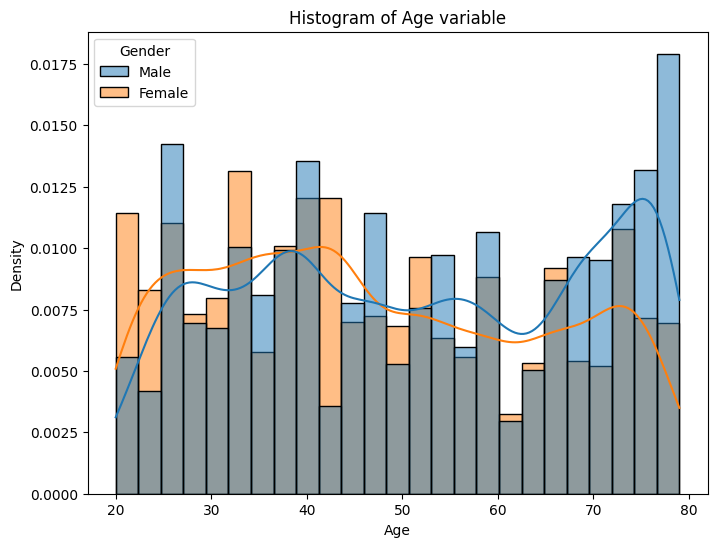

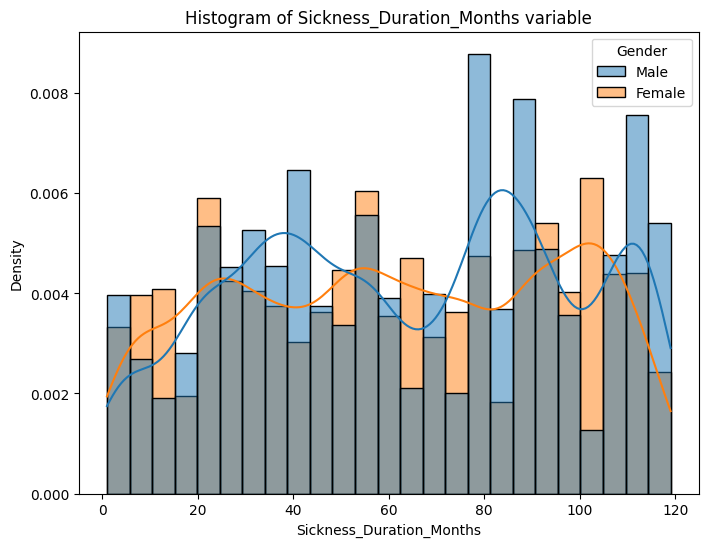

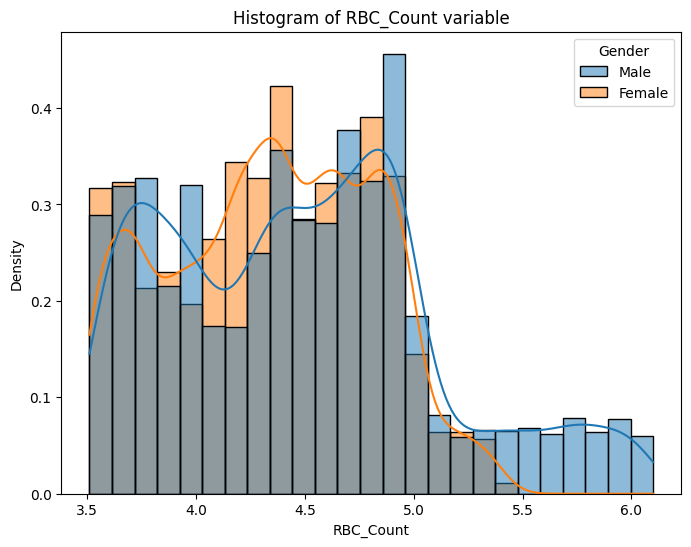

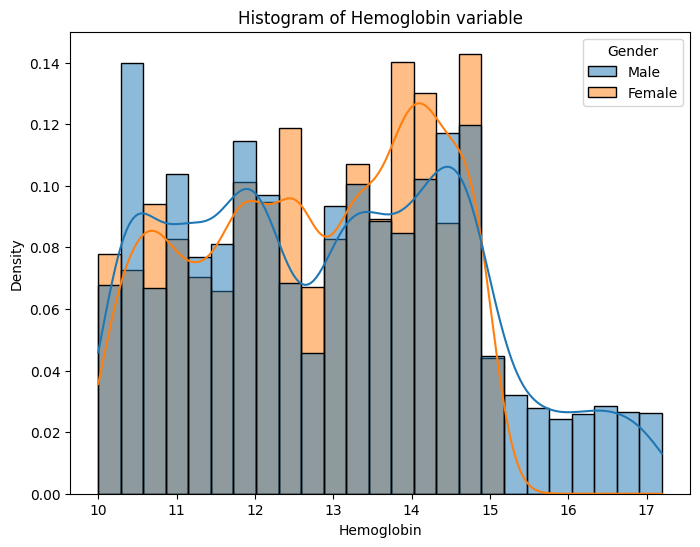

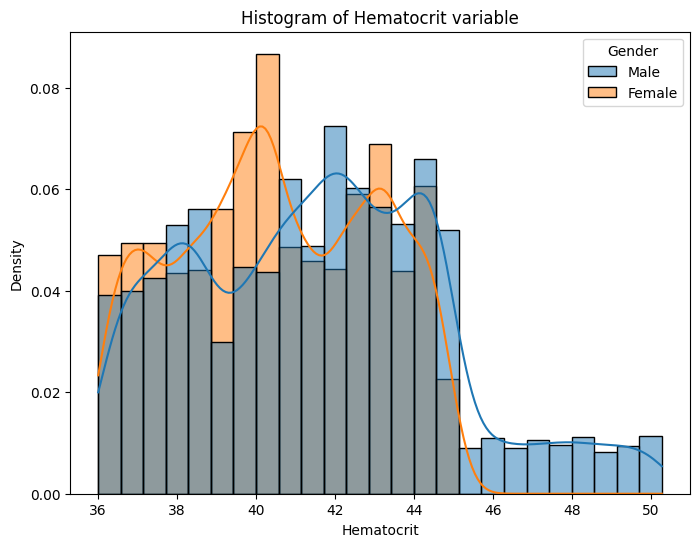

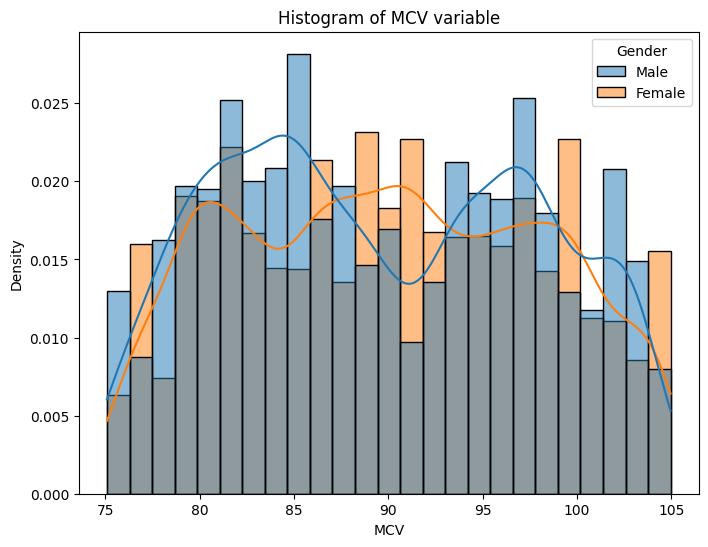

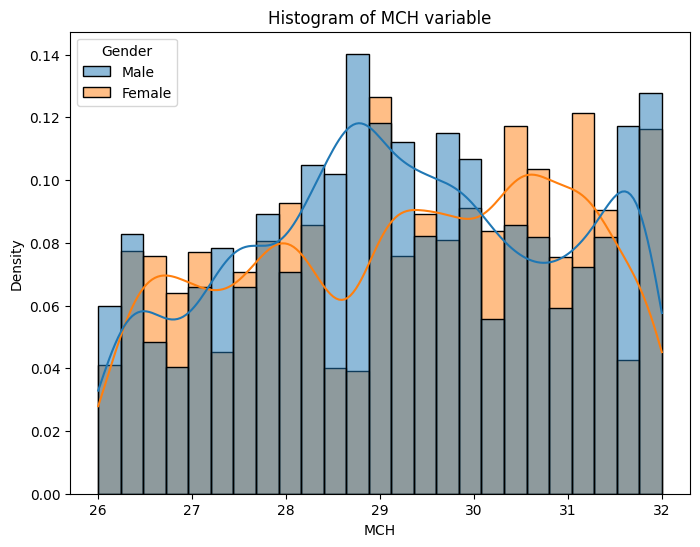

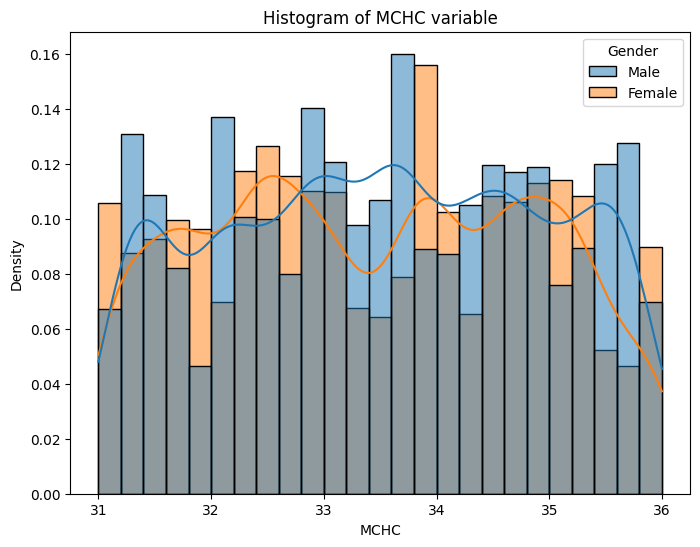

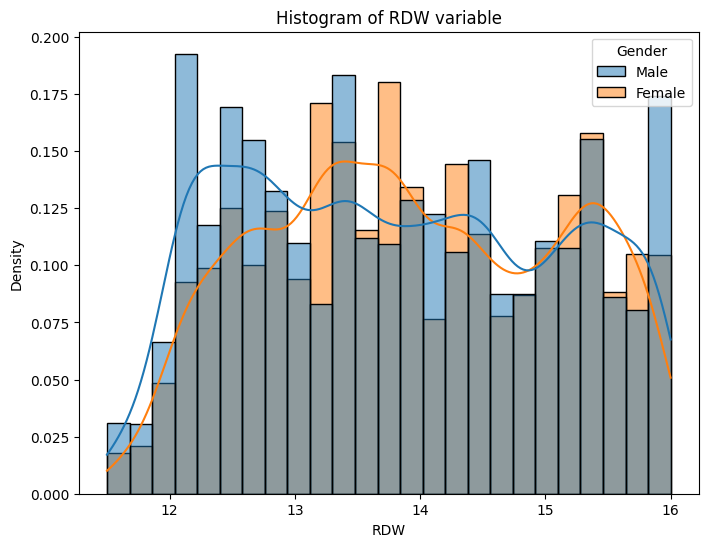

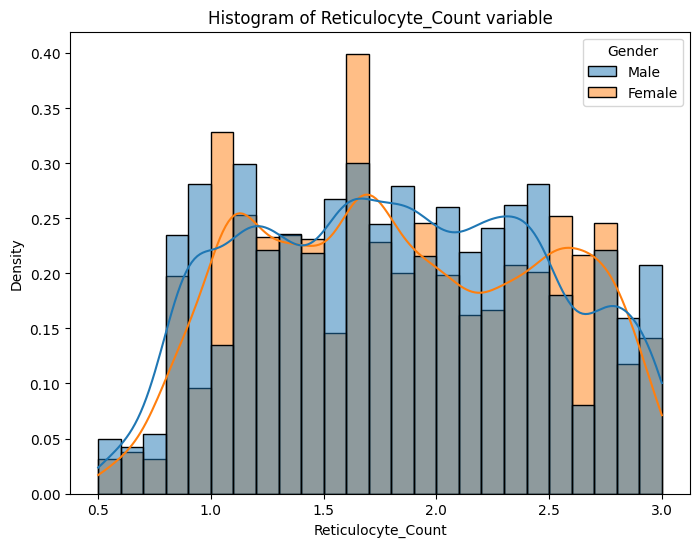

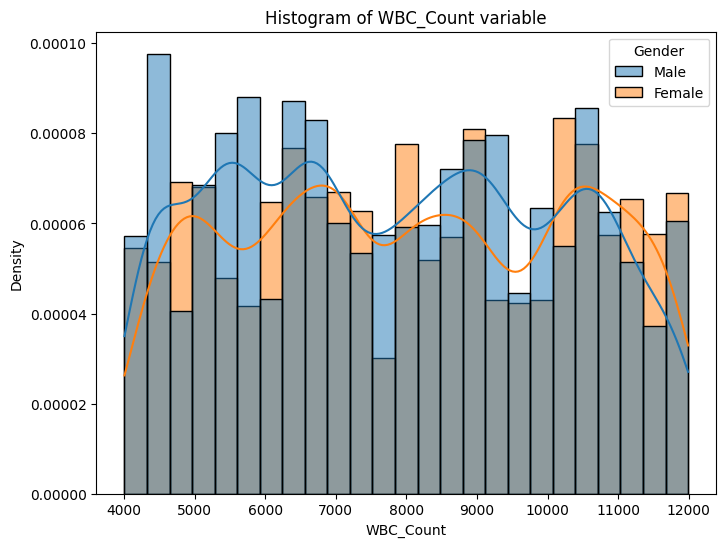

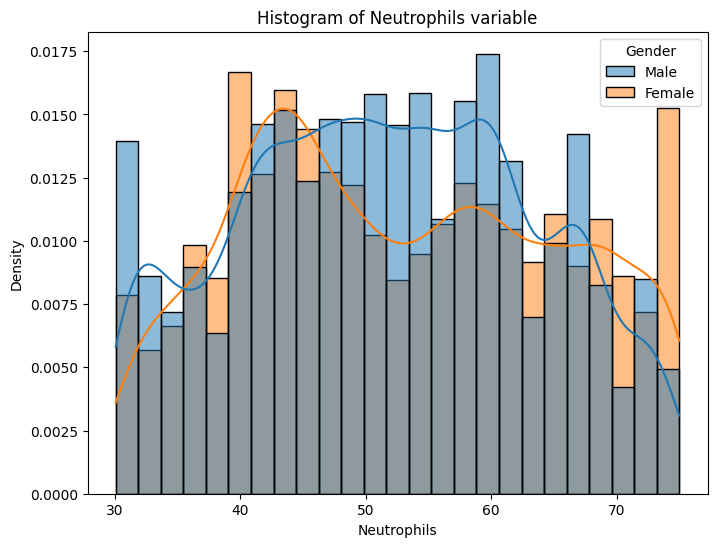

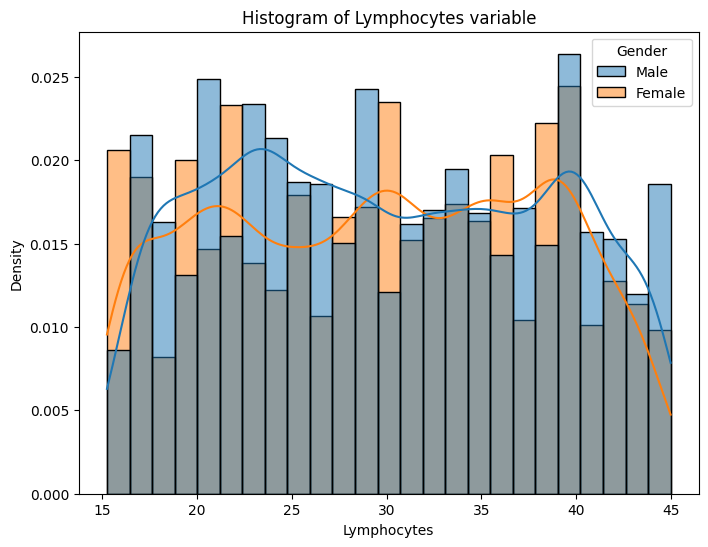

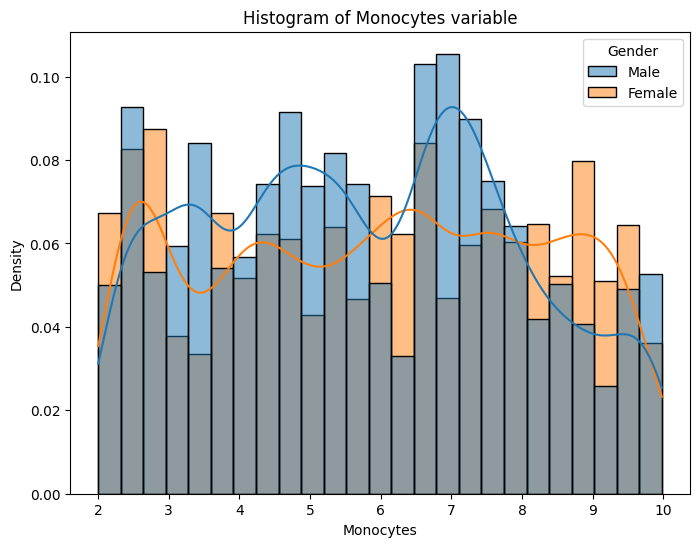

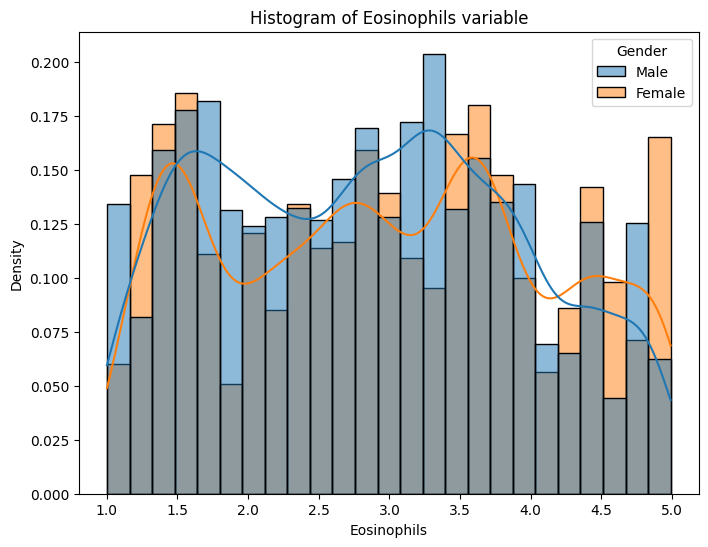

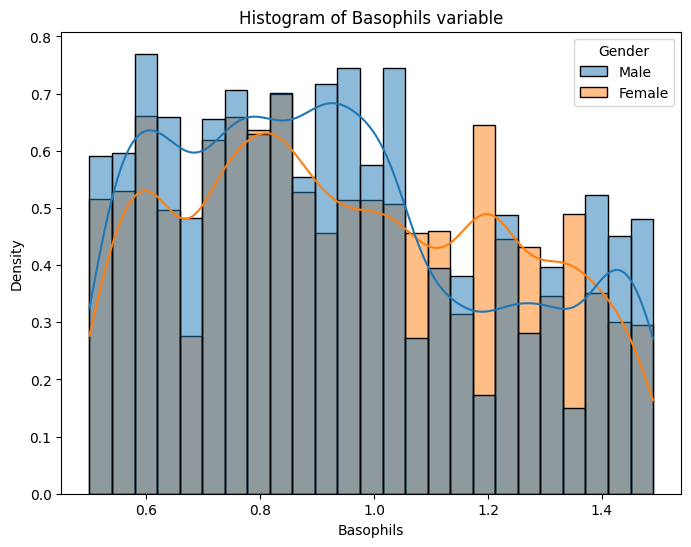

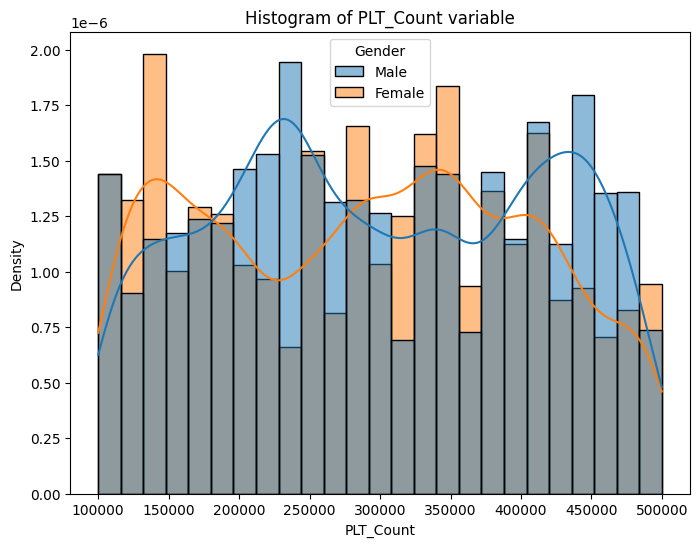

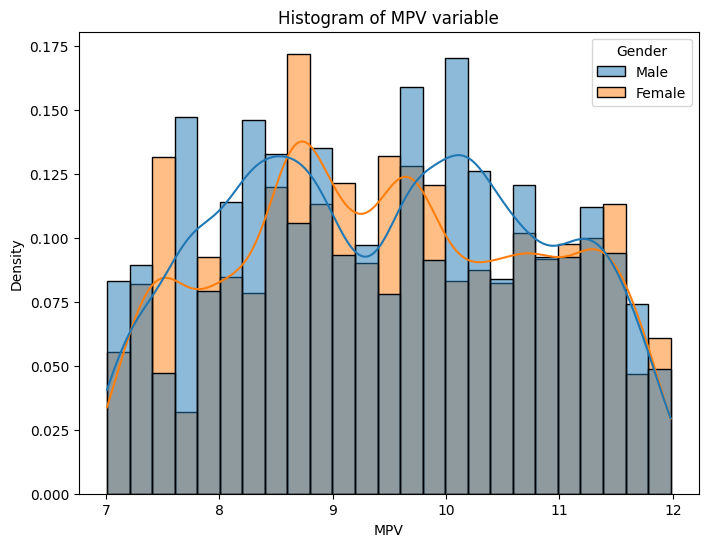

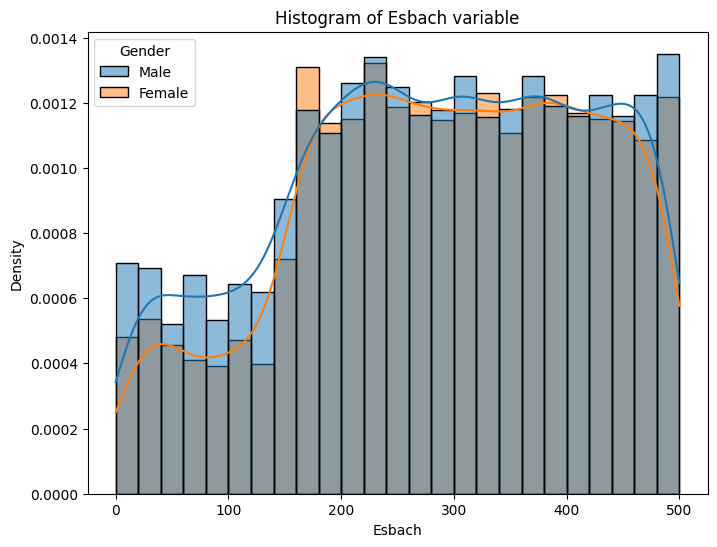

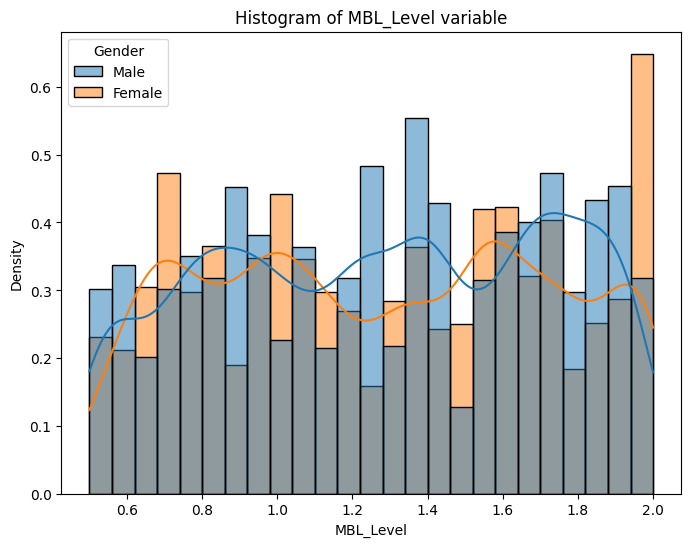

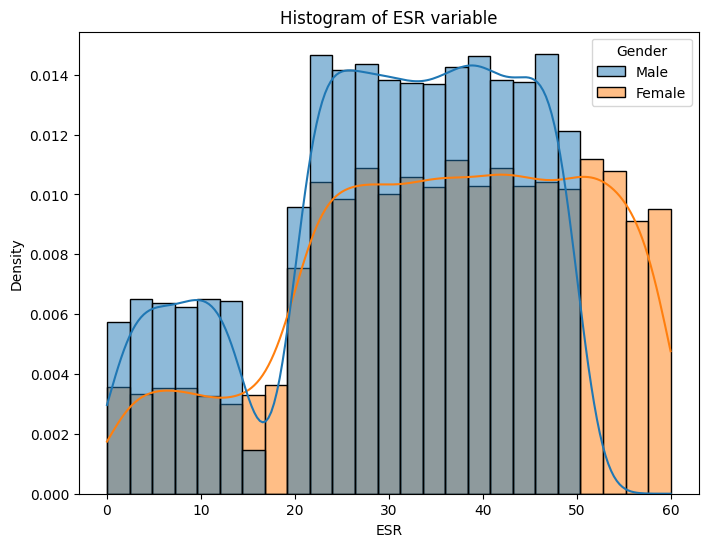

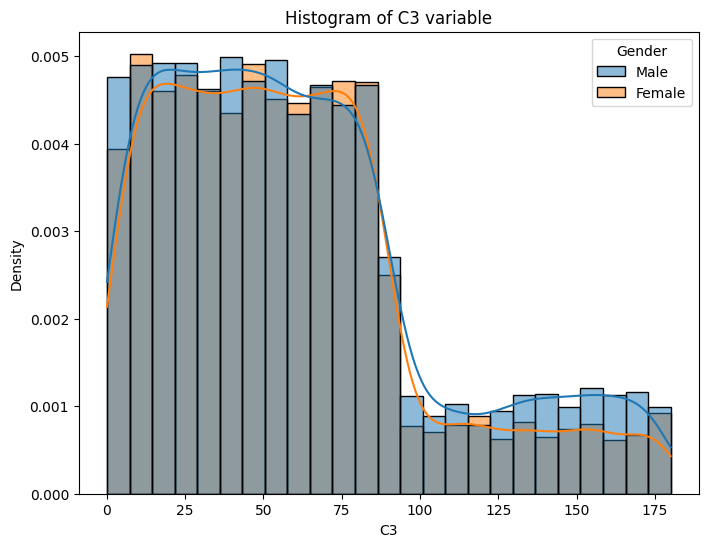

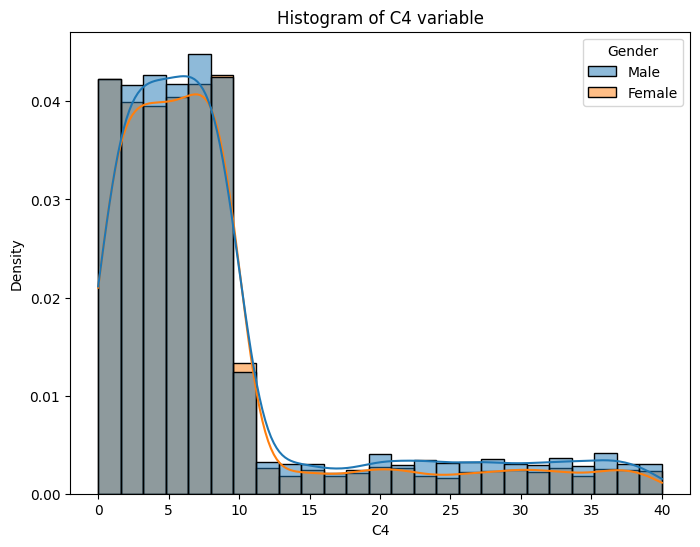

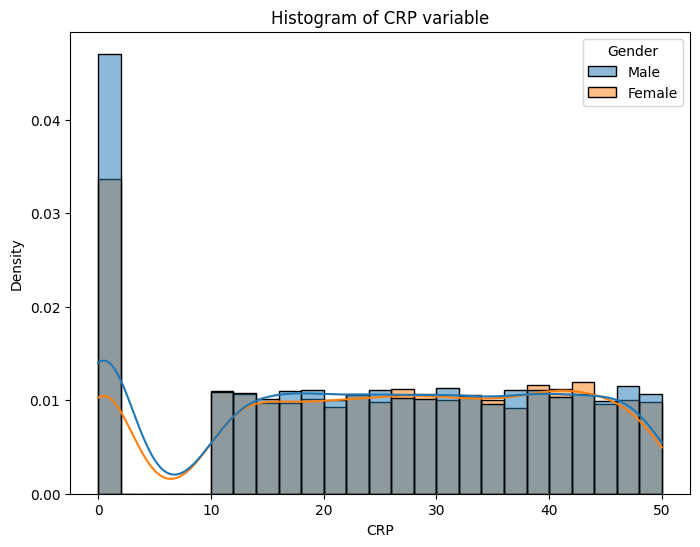

In [42]:
# histograms for numerical variables
for var in list(df.select_dtypes(include='float64').columns):
    plt.figure(figsize=(8,6))
    sns.histplot(df, x=var, bins=25, hue='Gender', kde=True, stat='density')
    plt.title(f'Histogram of {var} variable')
    plt.show()

In [43]:
df['Diseases_group'] = df['Diseases_group'].astype('category').cat.codes

In [44]:
df['Gender'] = np.where(df['Gender'] == 'Female',1,0)

In [45]:
numeric_data = df.select_dtypes(include=['float64'])

In [46]:
df['Diseases_group']

0        0
1        0
2        0
3        0
4        0
        ..
13807    2
13808    2
13809    2
13810    2
13811    2
Name: Diseases_group, Length: 13812, dtype: int8

In [47]:
numeric_data = df.select_dtypes(include=['float64','int8'])
numeric_data

Age  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0      62.0                      41.0   4.750000   13.370000   43.110000   
1      54.0                      41.0   4.320000   10.760000   39.920000   
2      34.0                      86.0   4.420000   11.910000   38.380000   
3      22.0                      43.0   4.330000   12.720000   39.990000   
4      20.0                      50.0   3.990000   11.070000   43.580000   
...     ...                       ...        ...         ...         ...   
13807  30.0                      76.0   4.369449   12.616547   40.702933   
13808  78.0                      34.0   5.104874   14.749487   42.749227   
13809  33.0                      56.0   5.840766   16.979142   47.139018   
13810  37.0                     110.0   5.197375   14.351748   42.746795   
13811  73.0                     112.0   5.986583   15.815299   42.444557   

              MCV        MCH       MCHC        RDW  Reticulocyte_Count  \
0      101.910000  28.410000  34.980000  12.120000            2.770000   
1       95.960000  28.220000  31.700000  12.890000            2.980000   
2       80.560000  28.400000  35.210000  12.730000            1.350000   
3       84.710000  26.670000  31.250000  14.620000            1.630000   
4       89.870000  30.640000  32.770000  14.450000            2.120000   
...           ...        ...        ...        ...                 ...   
13807   99.409783  29.852514  34.203124  13.359379            2.088784   
13808   97.561459  30.820043  33.599254  13.675515            1.240863   
13809   80.555161  28.324916  33.767540  11.700203            2.195858   
13810   80.760921  28.409289  33.707538  13.614987            2.075076   
13811   83.665471  31.380579  35.329164  12.416254            0.654925   

       WBC_Count  Neutrophils  Lymphocytes  Monocytes  Eosinophils  Basophils  \
0         4458.0    40.050000    34.540000   3.290000     4.420000   0.830000   
1         4974.0    32.300000    17.210000   2.110000     4.240000   1.440000   
2         8766.0    32.300000    20.940000   5.810000     4.530000   1.330000   
3         8828.0    34.620000    25.830000   3.300000     2.300000   0.810000   
4         4583.0    56.560000    42.860000   7.510000     2.300000   1.240000   
...          ...          ...          ...        ...          ...        ...   
13807     8806.0    49.523295    20.934829   4.465081     2.483303   0.993314   
13808     8443.0    41.880247    29.889194   7.375775     1.272507   0.713455   
13809     7611.0    45.271574    38.572941   5.302781     2.171452   0.542685   
13810     5466.0    41.045217    25.704629   7.876931     3.445088   0.772022   
13811     7776.0    44.320180    35.221746   5.611244     1.316343   0.800576   

           PLT_Count        MPV      Esbach  MBL_Level        ESR          C3  \
0      402793.000000   8.450000  154.915372       0.71  21.470329   14.274072   
1      145389.000000   7.220000  447.570310       1.58  31.601330    2.083559   
2      111764.000000  11.630000  236.292853       1.18  27.346259   73.459310   
3      276336.000000   8.400000  239.695961       0.95  23.728429   67.439371   
4      297272.000000   9.730000  466.374954       1.37  30.440890   54.250929   
...              ...        ...         ...        ...        ...         ...   
13807  346730.496533  10.838438  101.731314       1.09  19.254554   91.273470   
13808  429852.651031   8.393910   25.991969       1.75   3.528217   91.277690   
13809  199666.511359   8.113445   81.750752       1.22  12.557989  177.640134   
13810  421283.998327  10.054000  116.281738       0.65  12.323572  120.180540   
13811  353411.678971   9.394289   96.928630       0.52  12.567959  133.130671   

              C4        CRP  Diseases_group  
0       8.281658  29.182553               0  
1       6.555046  22.356969               0  
2       6.957688  24.933347               0  
3       4.355488  46.448538               0  
4       7.824894  45.904132   

In [48]:
categorical_data = df.select_dtypes(include=['int64','int32','int8'])
categorical_data

Gender  ANA  AntidsDNA  AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  \
0           0    1          1       0                  1     1         1   
1           1    0          1       1                  0     0         1   
2           0    0          0       1                  0     1         1   
3           0    1          1       0                  1     1         0   
4           1    0          1       0                  0     1         1   
...       ...  ...        ...     ...                ...   ...       ...   
13807       1    0          0       1                  1     0         0   
13808       0    0          1       0                  0     0         0   
13809       0    0          1       0                  1     0         0   
13810       1    0          1       0                  0     0         0   
13811       0    0          1       0                  1     0         0   

       Anti_Tg  Anti_SMA  Low_grade_fever  Fatigue_or_chronic_tiredness  \
0            0         0                0                             1   
1            1         0                1                             0   
2            0         0                1                             0   
3            0         0                0                             1   
4            1         0                0                             1   
...        ...       ...              ...                           ...   
13807        1         0                0                             0   
13808        1         1                0                             1   
13809        0         0                0                             0   
13810        1         1                1                             1   
13811        0         0                1                             1   

       Dizziness  Weight_loss  Rashes_and_skin_lesions  \
0              0            0                        1   
1              1            0                        1   
2              0            1                        1   
3              0            1                        0   
4              1            1                        1   
...          ...          ...                      ...   
13807          1            1                        0   
13808          1            0                        1   
13809          1            0                        1   
13810          1            0                        1   
13811          1            0                        0   

       Stiffness_in_the_joints  Brittle_hair_or_hair_loss  \
0                            0                          1   
1                            1                          1   
2                            1                          0   
3                            0                          1   
4                            0                          1   
...                        ...                        ...   
13807                        0                          1   
13808                        1                          1   
13809                        1                          0   
13810                        0                          0   
13811                        1                          1   

       Dry_eyes_and_or_mouth  General_unwell_feeling  Joint_pain  Anti_dsDNA  \
0                          1                       1           0           0   
1                          1                       0           1           0   
2                          1                       1           0           0   
3                          0                       0           1           0   
4                          0                       1           1           0   
...                      ...                     ...         ...         ...   
13807                      1                       0           1           0   
13808                      1                       0           0           0   
13809                      0               

In [49]:
categorical_data

Gender  ANA  AntidsDNA  AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  \
0           0    1          1       0                  1     1         1   
1           1    0          1       1                  0     0         1   
2           0    0          0       1                  0     1         1   
3           0    1          1       0                  1     1         0   
4           1    0          1       0                  0     1         1   
...       ...  ...        ...     ...                ...   ...       ...   
13807       1    0          0       1                  1     0         0   
13808       0    0          1       0                  0     0         0   
13809       0    0          1       0                  1     0         0   
13810       1    0          1       0                  0     0         0   
13811       0    0          1       0                  1     0         0   

       Anti_Tg  Anti_SMA  Low_grade_fever  Fatigue_or_chronic_tiredness  \
0            0         0                0                             1   
1            1         0                1                             0   
2            0         0                1                             0   
3            0         0                0                             1   
4            1         0                0                             1   
...        ...       ...              ...                           ...   
13807        1         0                0                             0   
13808        1         1                0                             1   
13809        0         0                0                             0   
13810        1         1                1                             1   
13811        0         0                1                             1   

       Dizziness  Weight_loss  Rashes_and_skin_lesions  \
0              0            0                        1   
1              1            0                        1   
2              0            1                        1   
3              0            1                        0   
4              1            1                        1   
...          ...          ...                      ...   
13807          1            1                        0   
13808          1            0                        1   
13809          1            0                        1   
13810          1            0                        1   
13811          1            0                        0   

       Stiffness_in_the_joints  Brittle_hair_or_hair_loss  \
0                            0                          1   
1                            1                          1   
2                            1                          0   
3                            0                          1   
4                            0                          1   
...                        ...                        ...   
13807                        0                          1   
13808                        1                          1   
13809                        1                          0   
13810                        0                          0   
13811                        1                          1   

       Dry_eyes_and_or_mouth  General_unwell_feeling  Joint_pain  Anti_dsDNA  \
0                          1                       1           0           0   
1                          1                       0           1           0   
2                          1                       1           0           0   
3                          0                       0           1           0   
4                          0                       1           1           0   
...                      ...                     ...         ...         ...   
13807                      1                       0           1           0   
13808                      1                       0           0           0   
13809                      0               

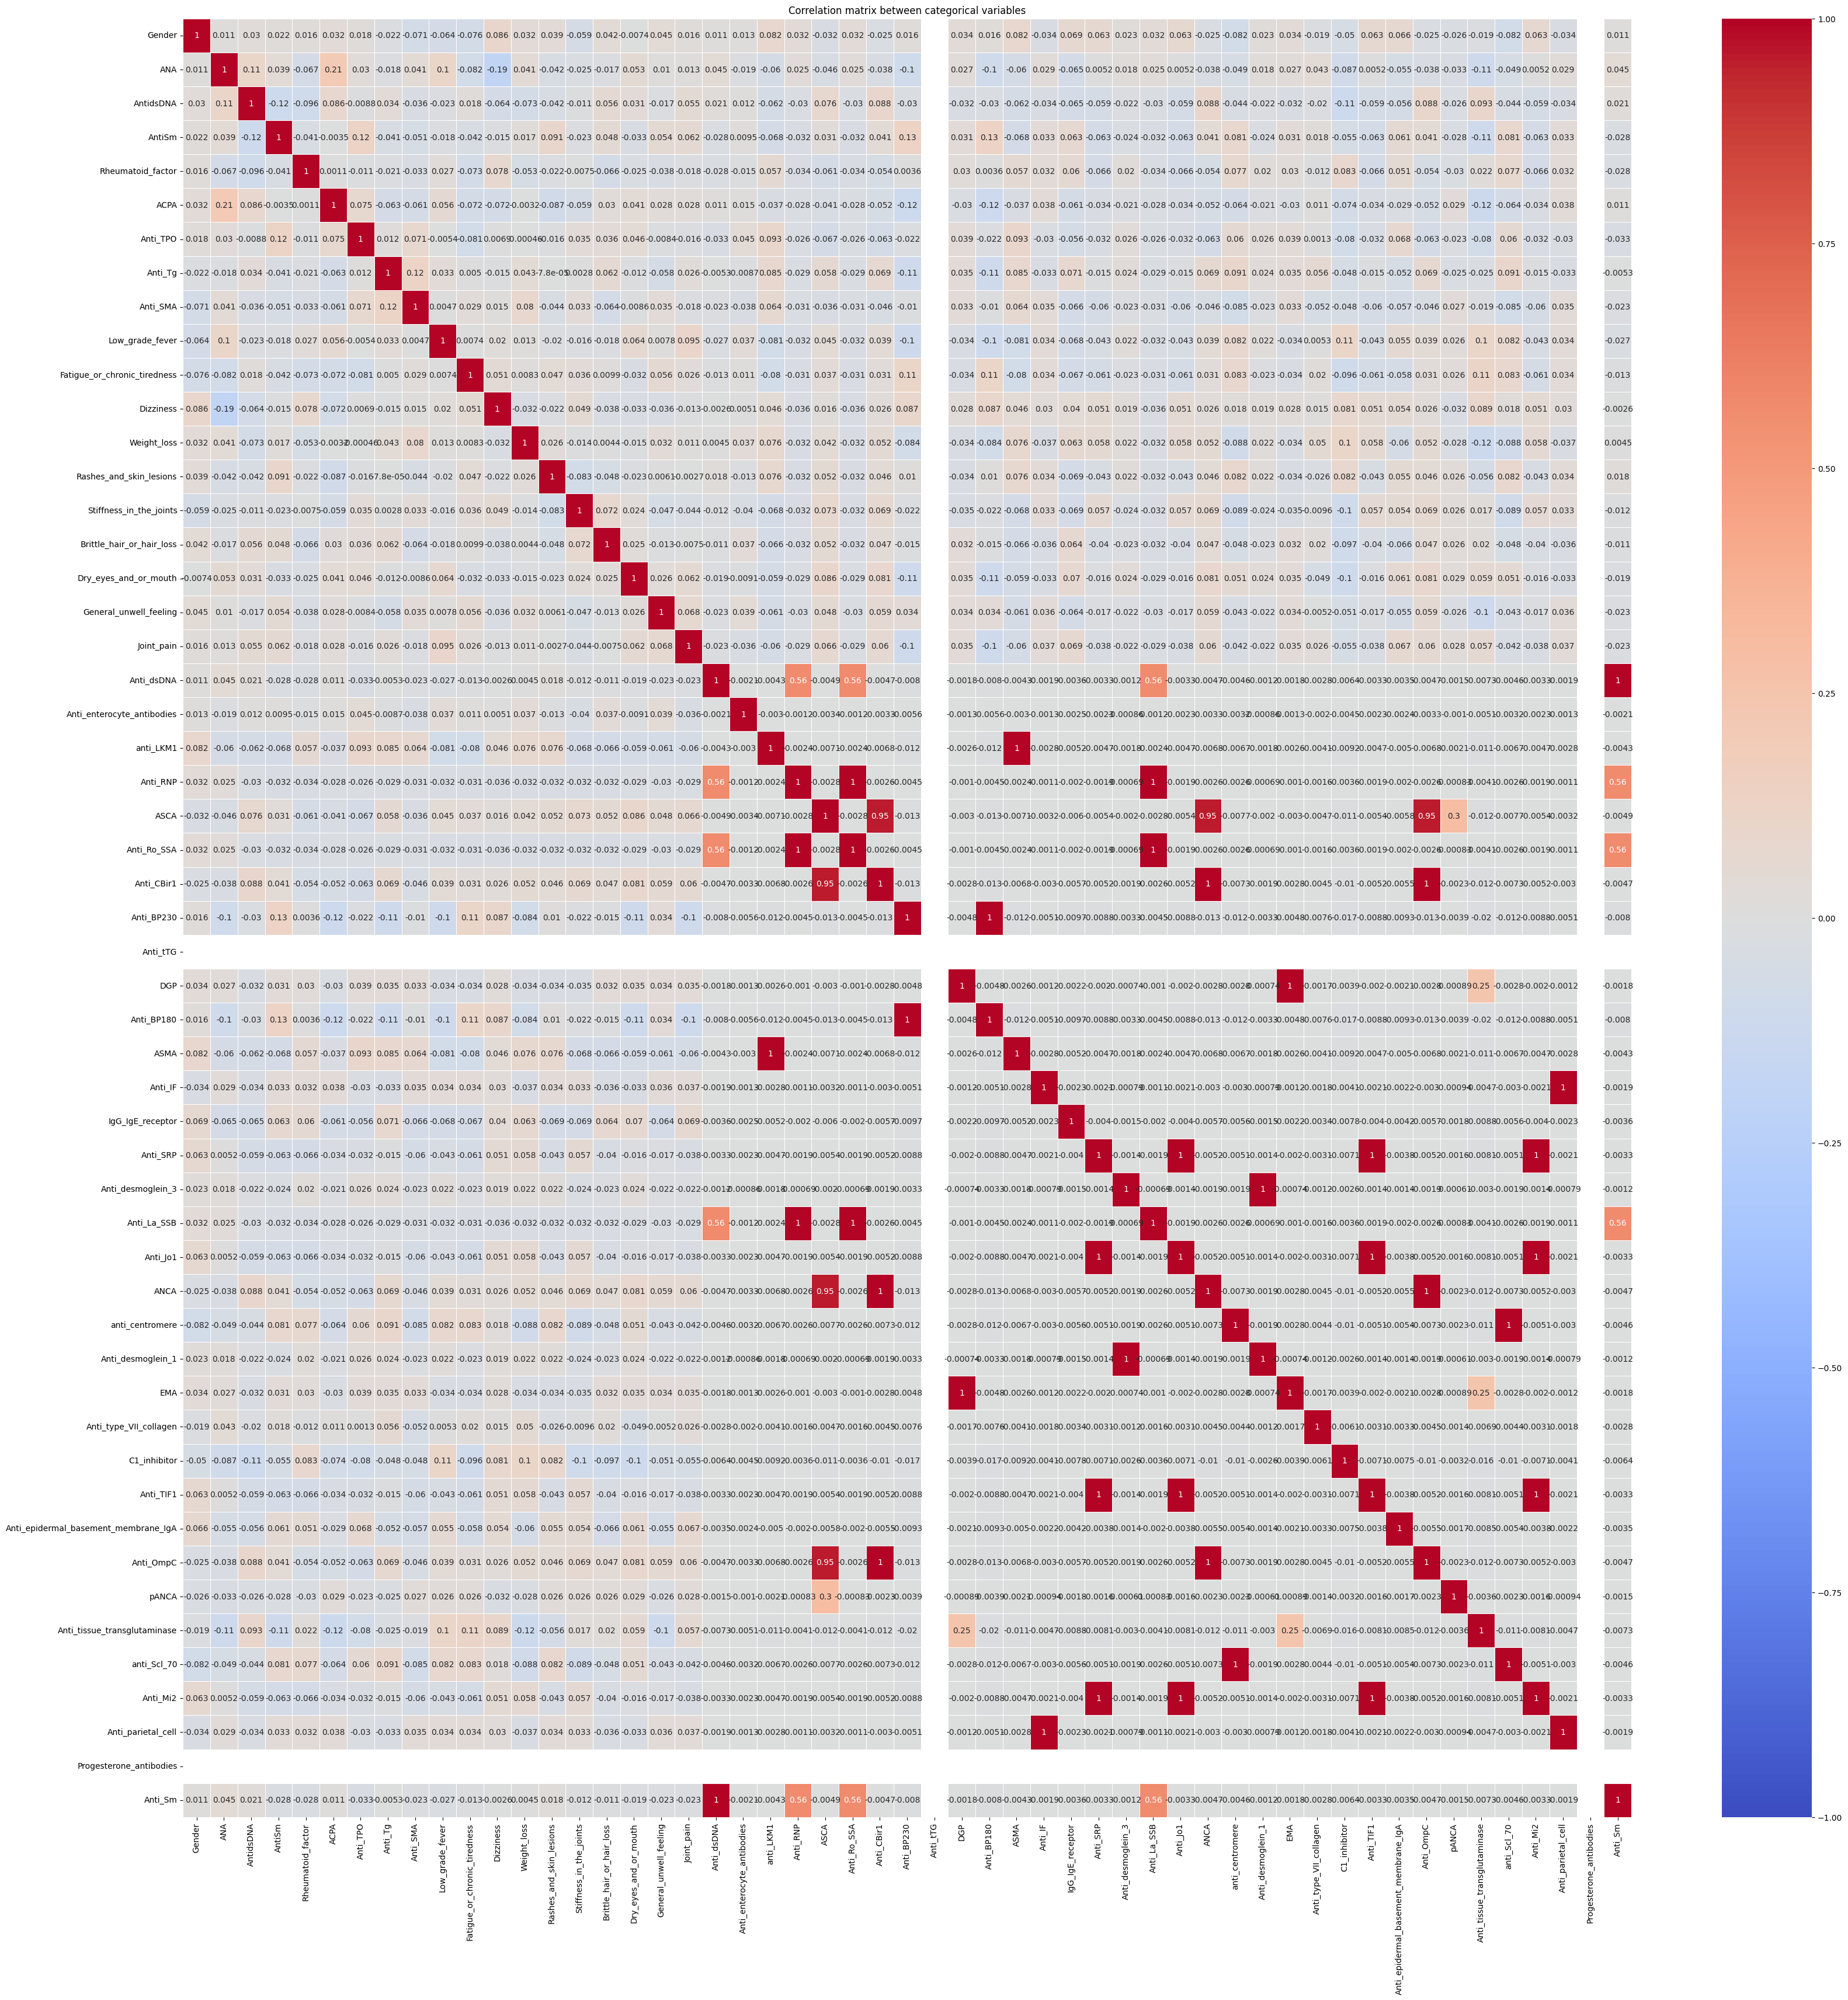

In [50]:
cat_var_corr_matrix = categorical_data.drop(columns='Diseases_group',axis=1).corr(method='spearman')

plt.figure(figsize=(40,40))
sns.heatmap(cat_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables')
plt.show()

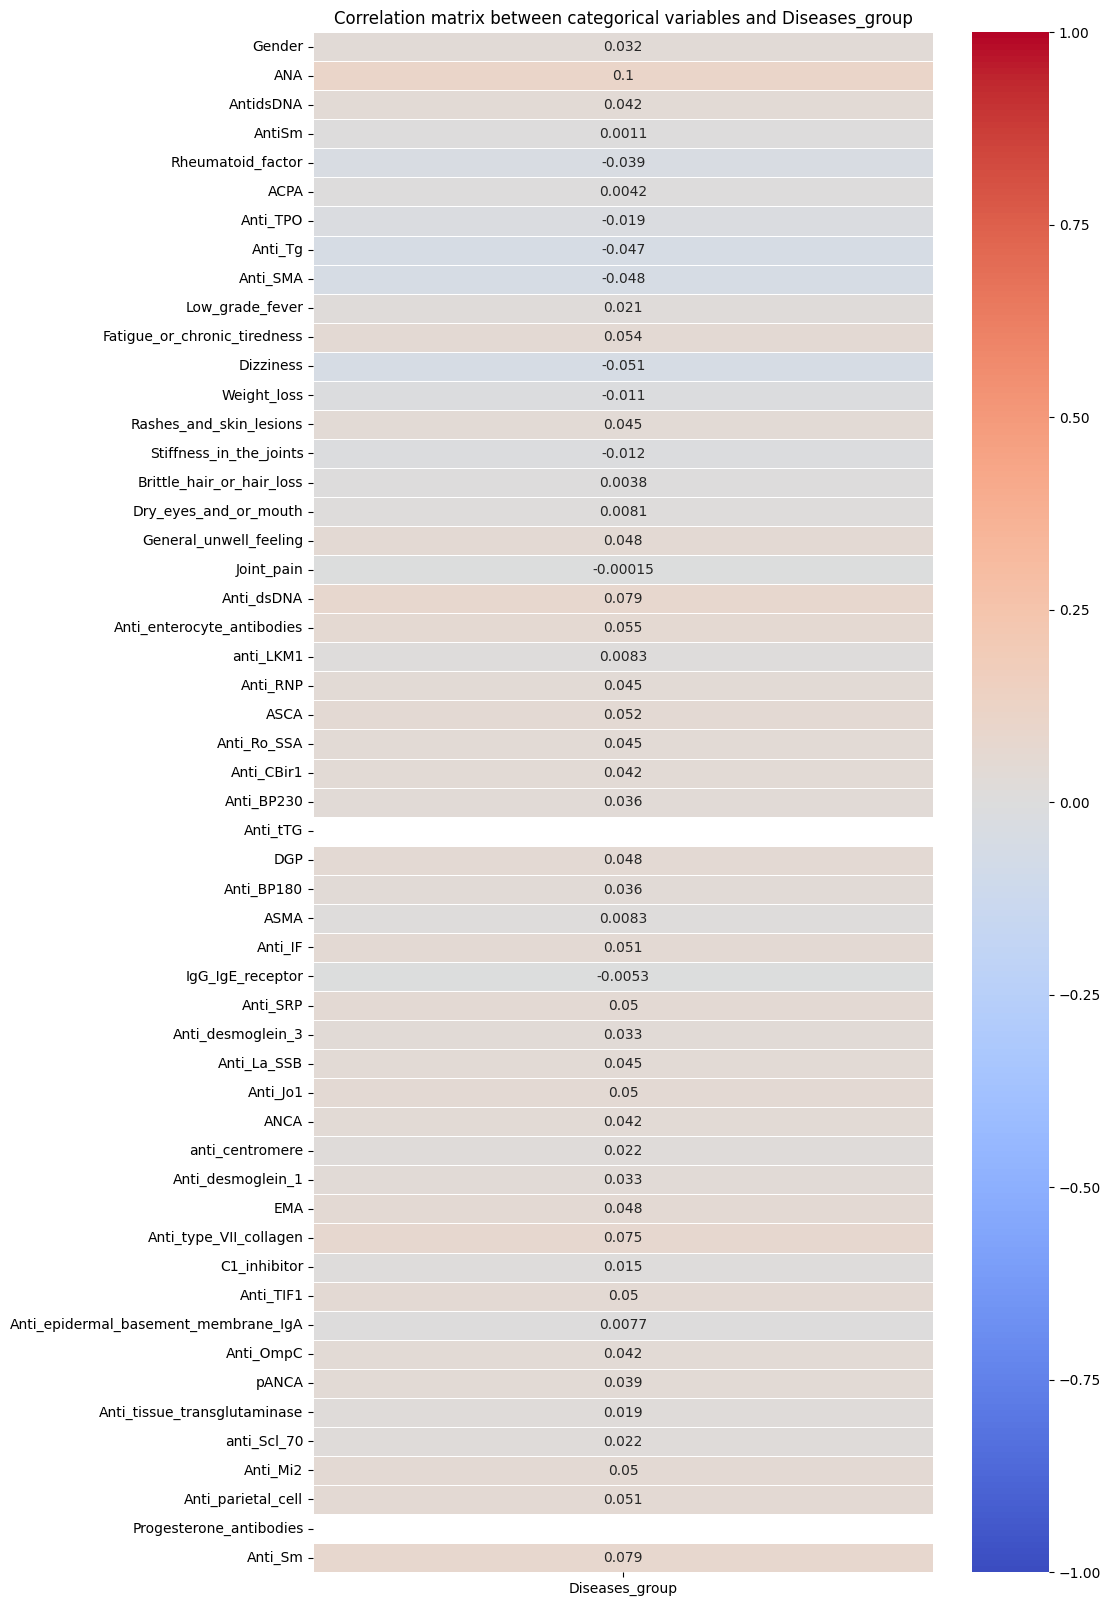

In [51]:
cat_var_y_corr_matrix = categorical_data.corr(method='spearman')

plt.figure(figsize=(10,20))
cat_diseases_corr = cat_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(cat_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables and Diseases_group')
plt.show()

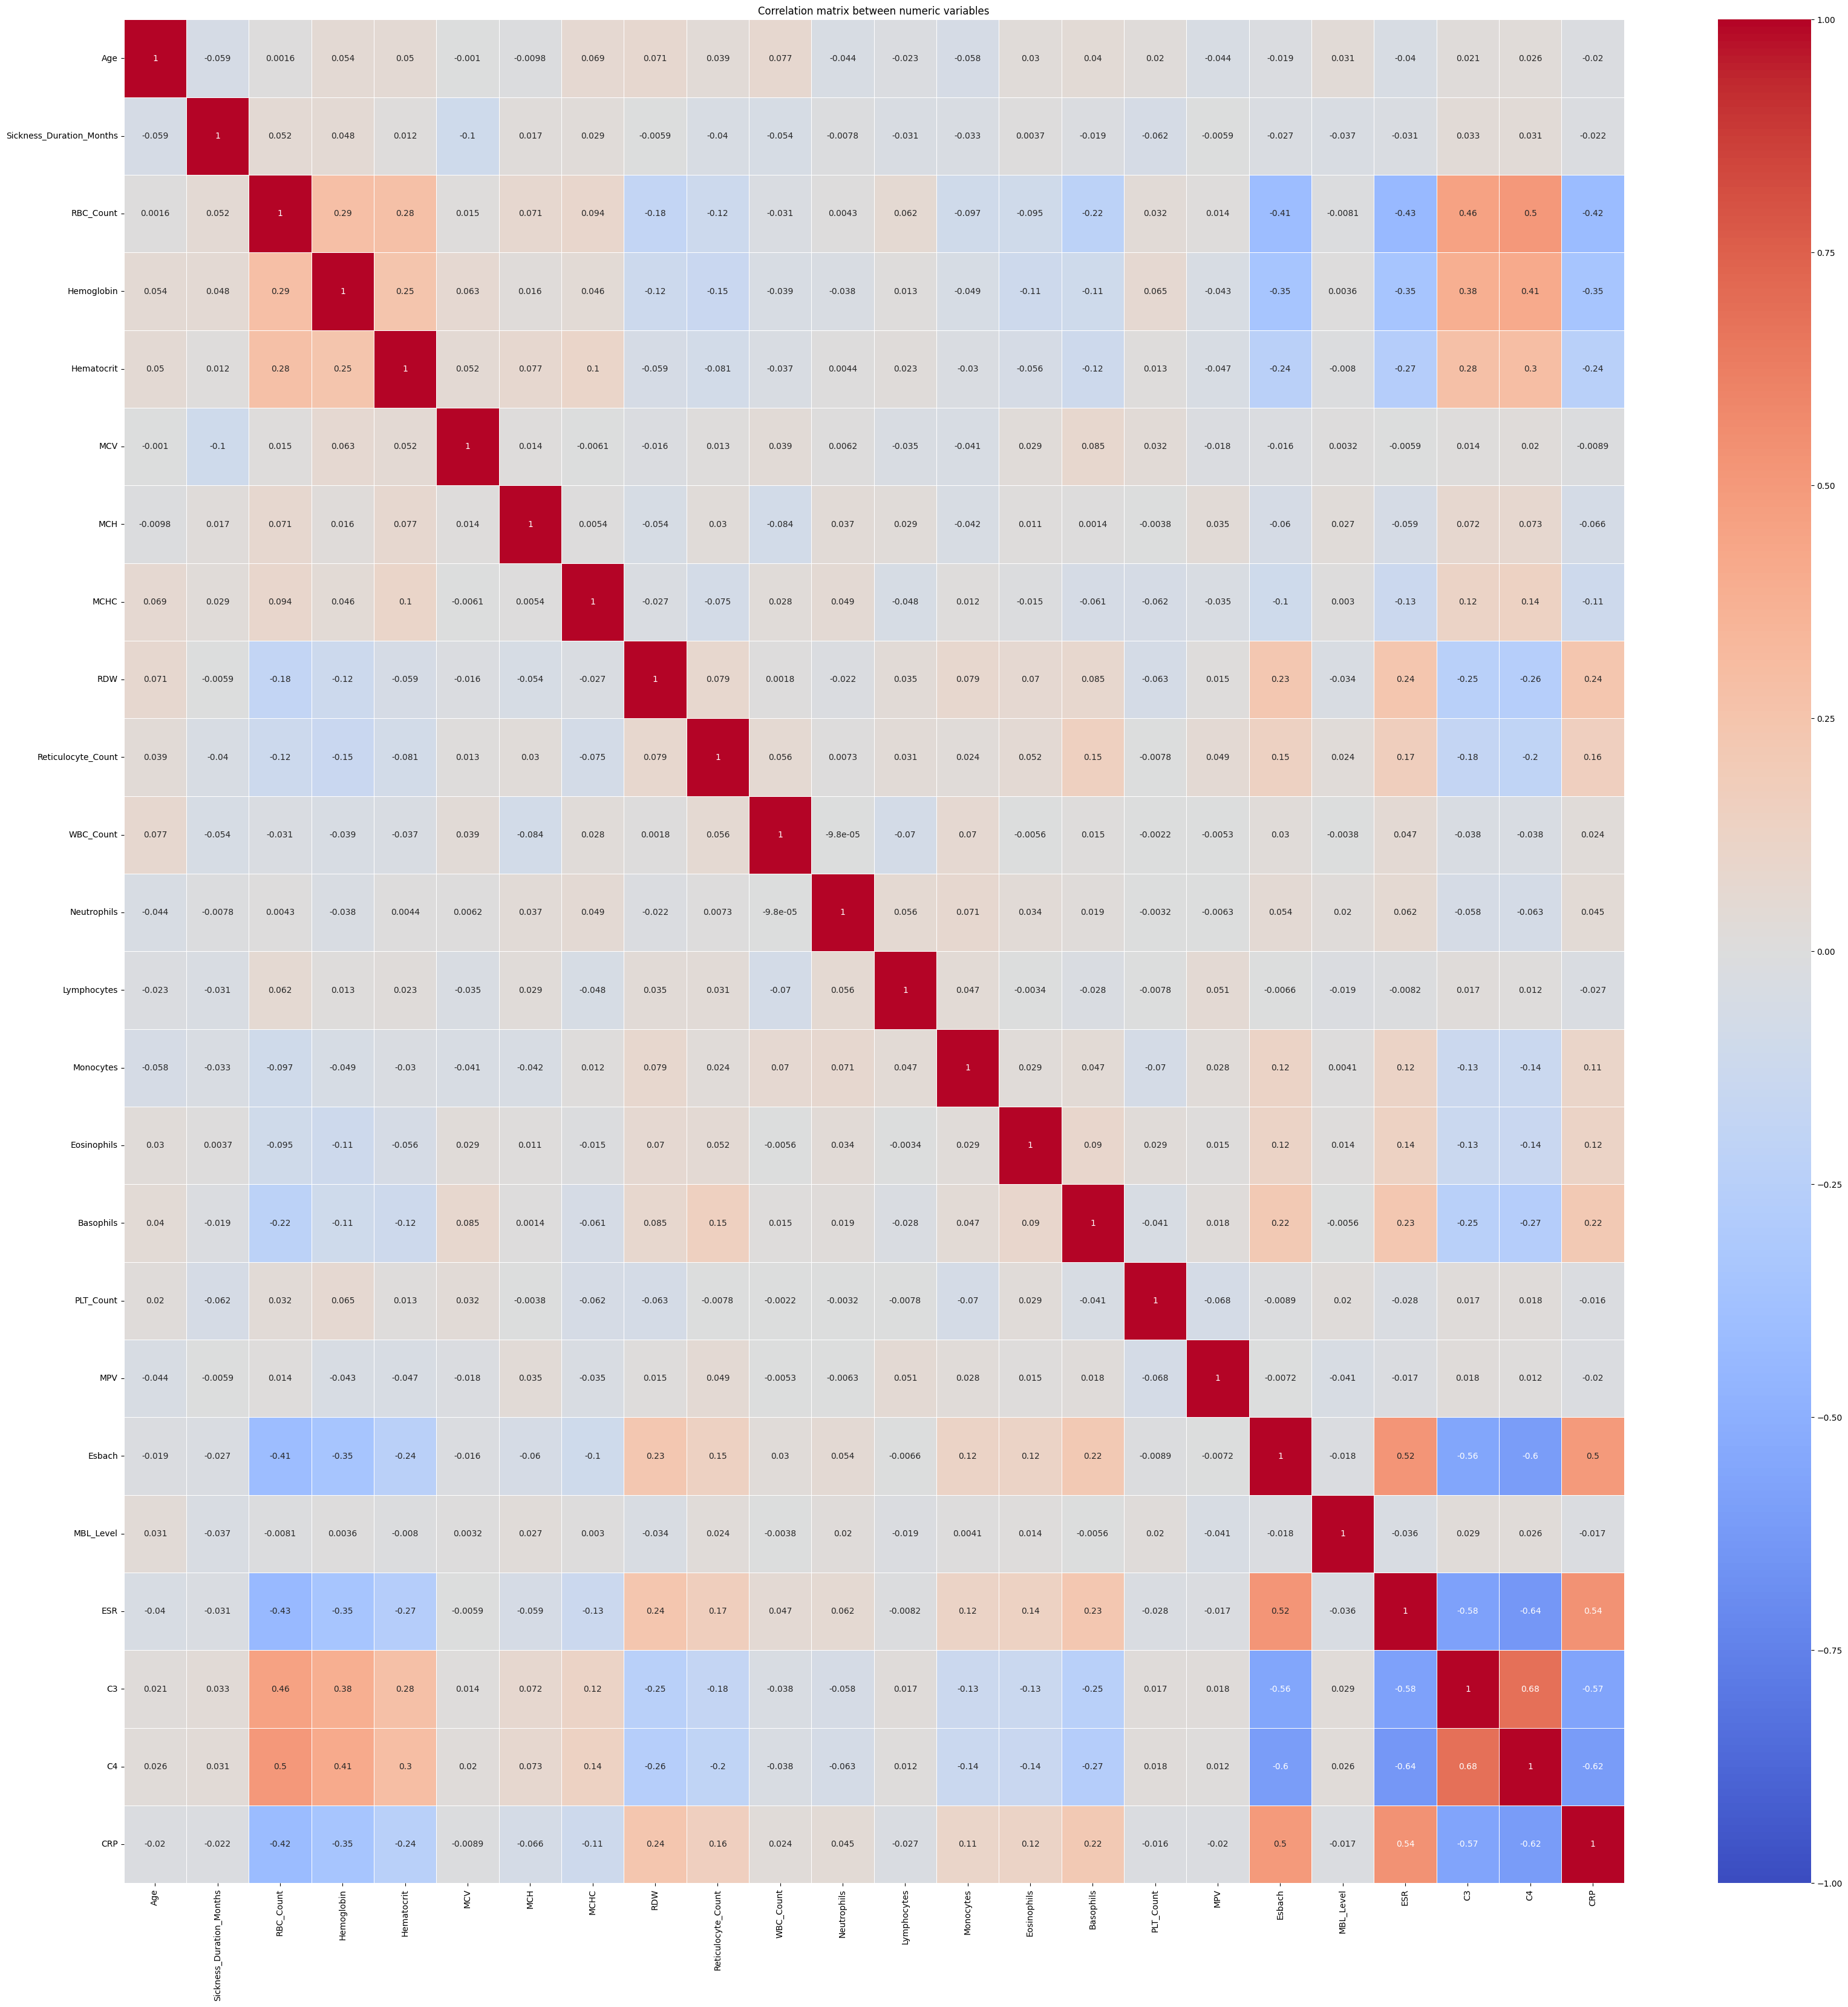

In [52]:
num_var_corr_matrix = numeric_data.drop(columns='Diseases_group',axis=1).corr(method='pearson')

# num_var_corr_matrix = numeric_data_prim.corr(method='pearson')

plt.figure(figsize=(40,40))
sns.heatmap(num_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables')
plt.show()

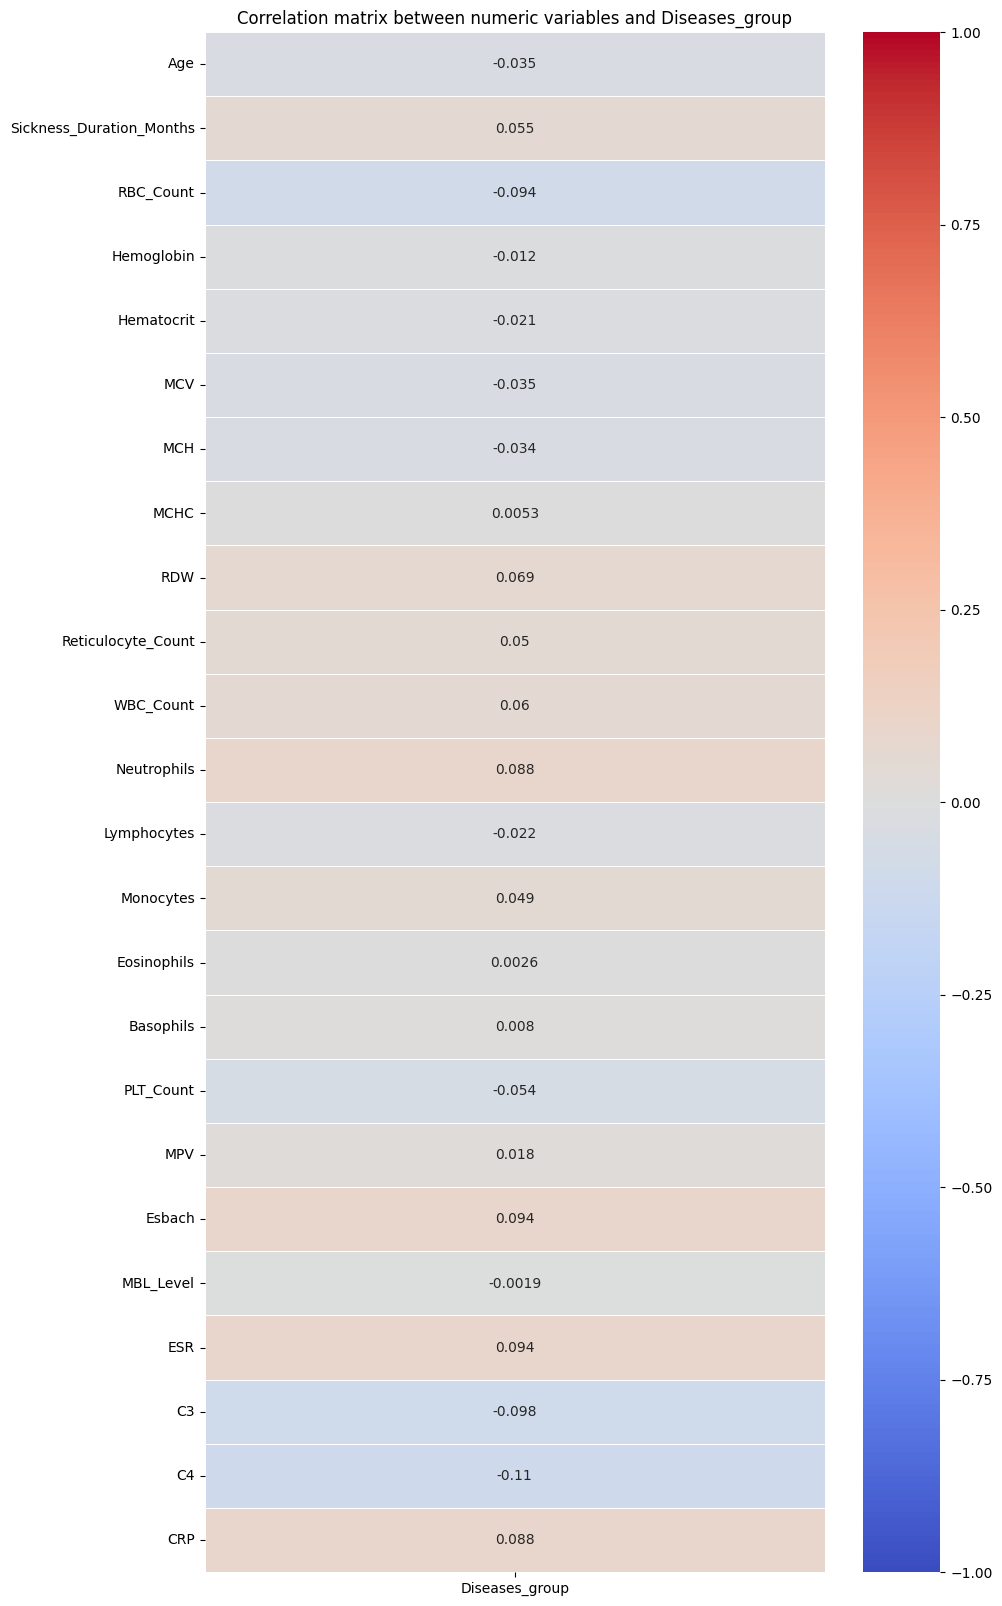

In [53]:
num_var_y_corr_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,20))
num_diseases_corr = num_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(num_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables and Diseases_group')
plt.show()

Because Pearson correlation values for numerical data are very low, we can check if there are some kind of different (not linear) relation between numerical columns

In [54]:
from pandas.plotting import scatter_matrix

num_attributes_1 = ['Age', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH']

num_attributes_2 = ['MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils']

num_attributes_3 = ['Basophils', 'PLT_Count', 'MPV', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP']

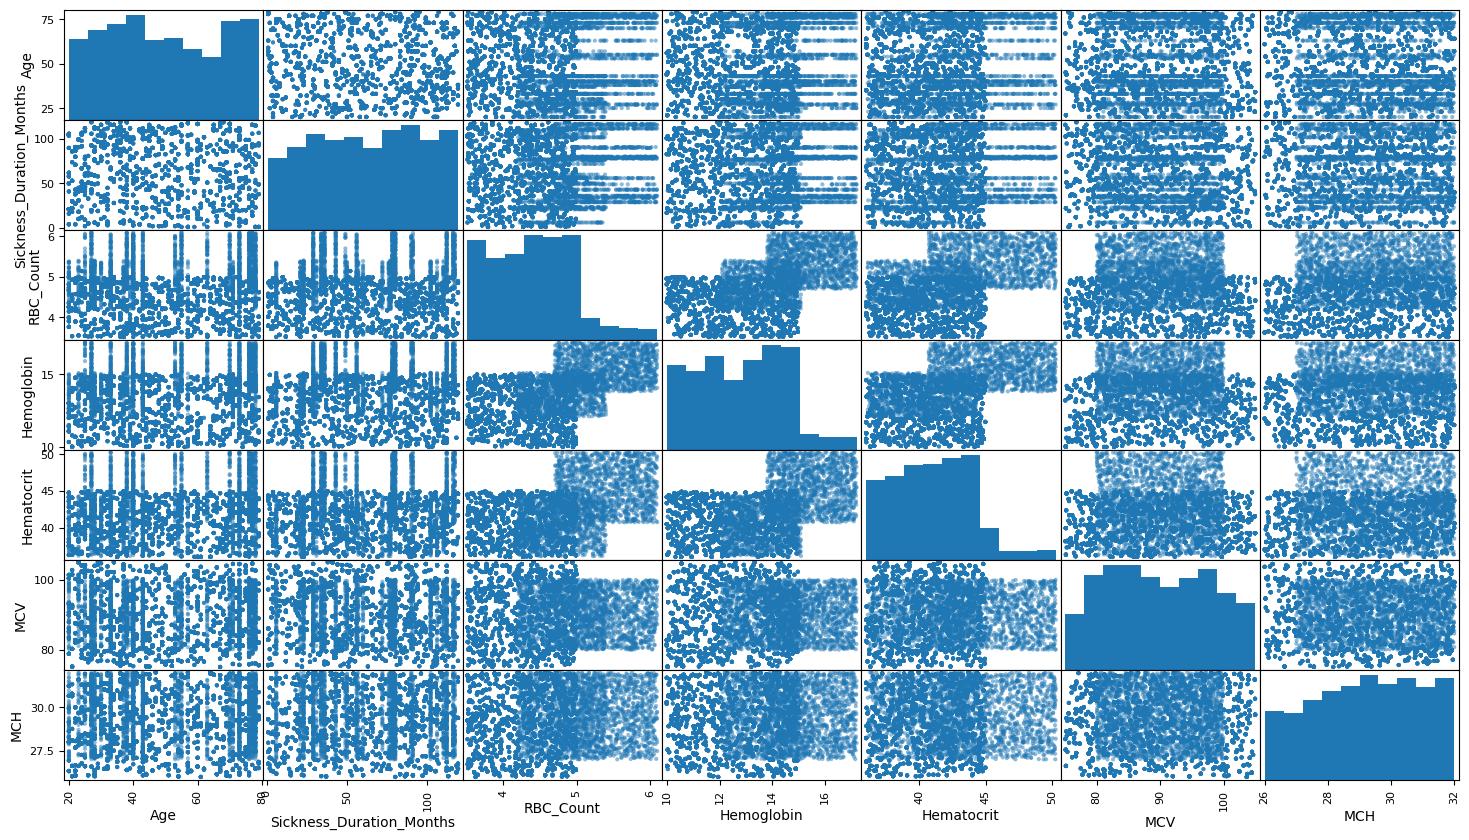

In [55]:
scatter_matrix(numeric_data[num_attributes_1],figsize=(18,10))
plt.show()

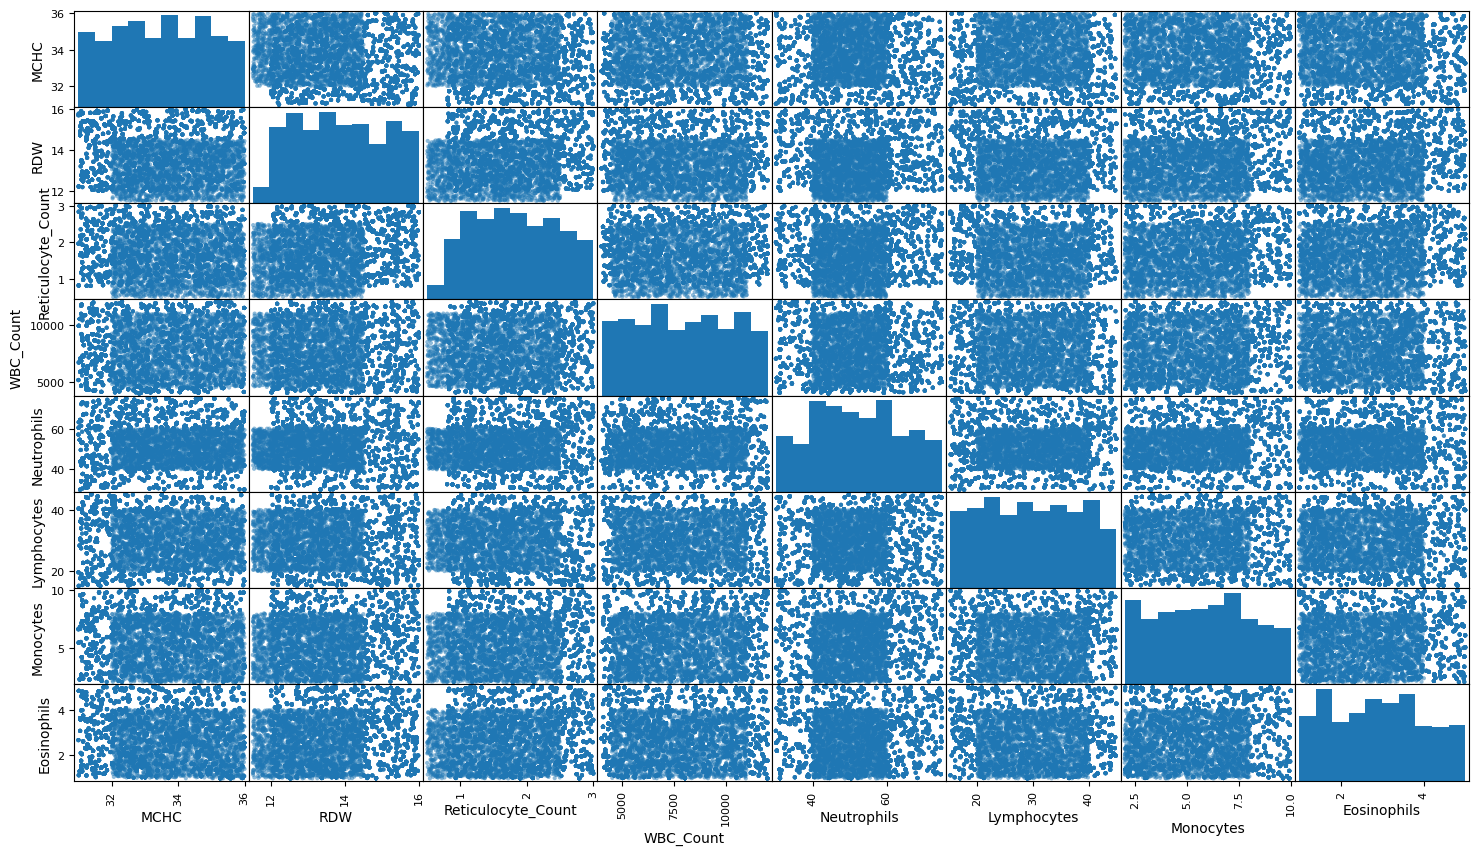

In [56]:
scatter_matrix(numeric_data[num_attributes_2],figsize=(18,10))
plt.show()

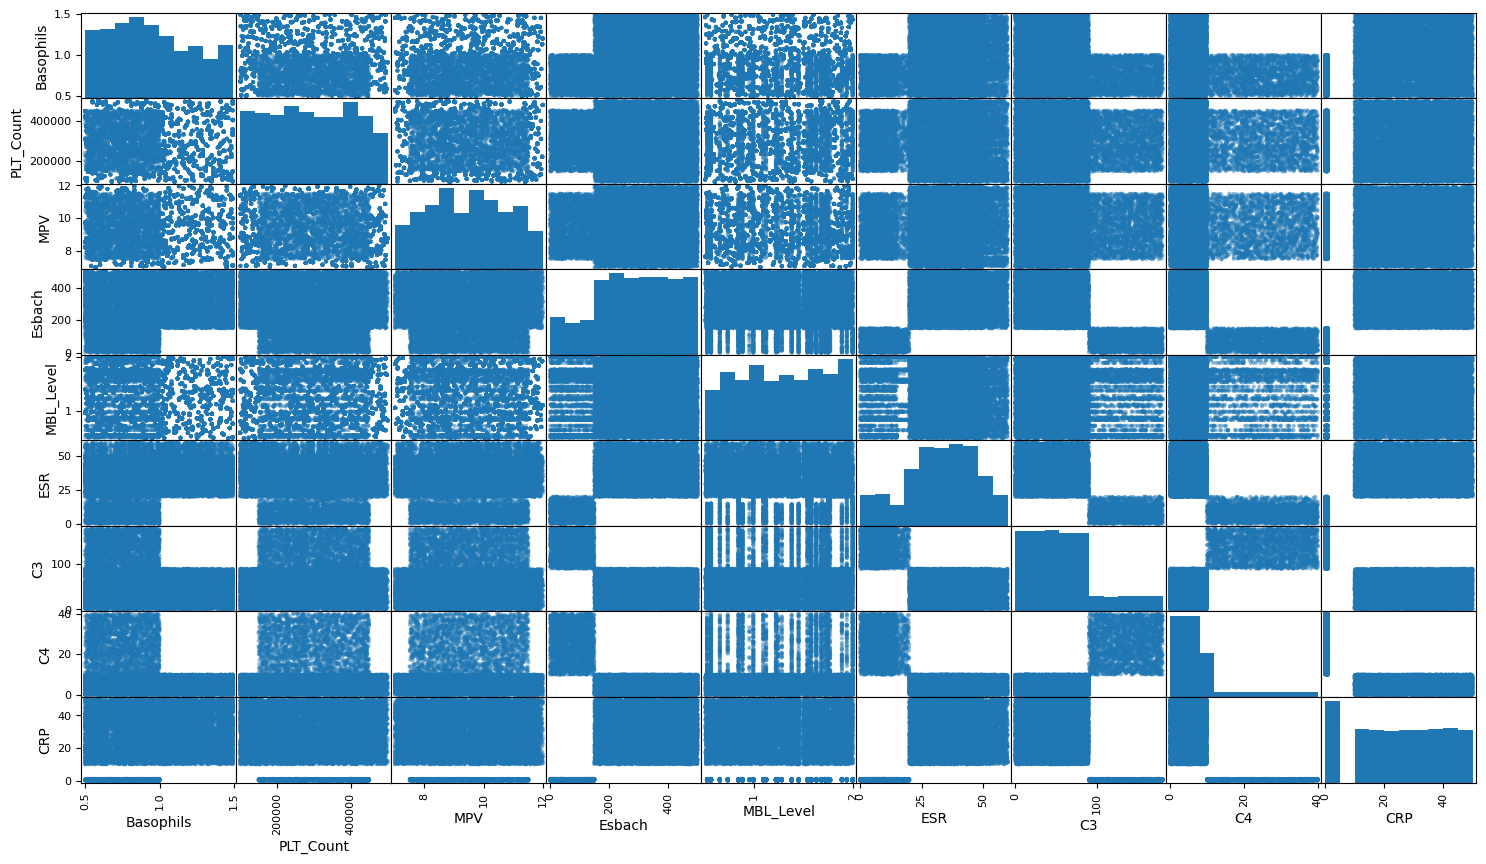

In [57]:
scatter_matrix(numeric_data[num_attributes_3],figsize=(18,10))
plt.show()

In [58]:
binary_low_variance_col = [
    "Anti_dsDNA", "Anti_enterocyte_antibodies", "anti_LKM1", "Anti_RNP", "ASCA",
    "Anti_Ro_SSA", "Anti_CBir1", "Anti_BP230", "DGP", "Anti_BP180", "ASMA", "Anti_IF",
    "IgG_IgE_receptor", "Anti_SRP", "Anti_desmoglein_3", "Anti_La_SSB", "Anti_Jo1",
    "ANCA", "anti_centromere", "Anti_desmoglein_1", "EMA", "Anti_type_VII_collagen",
    "C1_inhibitor", "Anti_TIF1", "Anti_epidermal_basement_membrane_IgA", "Anti_OmpC",
    "pANCA", "Anti_tissue_transglutaminase", "anti_Scl_70", "Anti_Mi2", "Anti_parietal_cell",
    "Progesterone_antibodies", "Anti_Sm"
]

for col in binary_low_variance_col:
    crosstab_table = pd.crosstab(df[col], df['Diseases_group'])
    print(f"Crosstab for {col} and Diseases_group:")
    print(crosstab_table)
    print("\n" + "-"*80 + "\n")

Crosstab for Anti_dsDNA and Diseases_group:
Diseases_group     0     1     2     3     4     5
Anti_dsDNA                                        
0               2490  2192  2230  2310  2200  2349
1                  0     0     0     0     0    41

--------------------------------------------------------------------------------

Crosstab for Anti_enterocyte_antibodies and Diseases_group:
Diseases_group                 0     1     2     3     4     5
Anti_enterocyte_antibodies                                    
0                           2490  2192  2230  2310  2200  2370
1                              0     0     0     0     0    20

--------------------------------------------------------------------------------

Crosstab for anti_LKM1 and Diseases_group:
Diseases_group     0     1     2     3     4     5
anti_LKM1                                         
0               2490  2192  2164  2310  2200  2371
1                  0     0    66     0     0    19

--------------------------

To finalize our EDA analysis we will calculate Information Value of each variable to get an information about its predictive power before we go forward to modelling

In [59]:
def iv_calc_one(data, feature, target):
    
    # WoE data calculation
    df_woe = (pd.crosstab(data[feature], data[target], normalize=True)
              .assign(woe=lambda probe: np.log(probe[1]/probe[0])))
    
    # IV data calculation
    iv_value = df_woe.assign(iv=lambda probe: np.sum(probe['woe'] * (probe[1]/probe[0])))
    iv_value = pd.Series(iv_value.iloc[:,-1]).unique()[0]
    
    return iv_value

In [60]:
# function to calculate Information Value and Weight of Evidence
# WoE = ln(Non_event_percentage/Event_percentage)
# IV = sigma(Event_percentage - Non_event_percentage) * WoE
# Event is probe when we have patient with one of our targeted diseases
# Non-event is probe when we have patient with one of our targeted diseases

def iv_calc(data, target, bins=10, woe_show=True):
    
    # Data frames to fill
    iv_df, woe_df = pd.DataFrame(), pd.DataFrame()
    
    # Independent variables list
    col_list = data.columns
    
    # WOE and IV calculation for each independent variable
    for col in col_list[~col_list.isin([target])]:
        if (data[col].dtype.kind in 'bifc') and (len(np.unique(data[col])) > 10):
            binned_x = pd.qcut(data[col], bins, duplicates='drop') # binned_x is to balance number of observation in each bin, so WoE wouldn't be biased
            d_temp = pd.DataFrame({'x': binned_x,
                                   'y': data[target]})
        else:
            d_temp = pd.DataFrame({'x': data[col],
                                   'y': data[target]})
            
        # Number of events in each group (bin)
        d = d_temp.groupby('x', as_index=False).agg({
            'y': ['count','sum']})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Percentage of events in each group (bin)
        d['Event_percentage'] = d['Events']/d['Events'].sum()
        
        # Non-events in each group (bin)
        d['Non_events'] = np.abs(d['N'] - d['Events'])
        # Non-events percentage in each group
        d['Non_event_percentage'] = d['Non_events']/d['Non_events'].sum()
        
        # WoE calculation 
        d['WoE'] = np.log(d['Event_percentage']/d['Non_event_percentage'])
        d['IV'] = d['WoE'] * (d['Event_percentage'] - d['Non_event_percentage'])
        d.insert(loc=0, column='Variable', value=col)
        tmp = pd.DataFrame({'Variable': [col],
                            'IV': [d['IV'].sum()]},
                            columns = ['Variable','IV'])
        iv_df = pd.concat([iv_df, tmp], axis=0)
        woe_df = pd.concat([woe_df, d], axis=0)
        
        # Whether to show WoE data frame
        if woe_show == True:
            print(woe_df)
    
    return iv_df, woe_df

In [61]:
# calculation of Information Value for variables in our dataset
iv_df = iv_calc(data=df, target='Diseases_group', bins=10, woe_show=False)[0]
iv_df[(iv_df['IV'] >= 0.1) & (iv_df['IV'] <= 0.5)]

Empty DataFrame
Columns: [Variable, IV]
Index: []

According to the outcomes of above IV analysis there are no variables that seem to have medium or strong predictive power

**Summary of Data Preprocessing and EDA for Classification Model**

 - Data Type Conversion: Data types of certain variables were converted from 'object' to 'float' or 'int' as needed for numerical operations.
 - Missing Data Handling: Rows containing missing values were removed from the dataset.
 - Duplicate Removal: There were no duplicate records in the dataset.
 - Outlier Detection and Correction: Outliers and erroneous values were detected using z-score analysis for numerical variables and frequency distribution analysis for binary and categorical variables. No outliers or erroneous values were found.
 - Low Variance Features: Features with extremely low variance (e.g., where 97% or more of the values belong to one category) were identified: Anti_dsDNA, Anti_enterocyte_antibodies, anti_LKM1, Anti_RNP, ASCA, Anti_Ro_SSA, Anti_CBir1, Anti_BP230, DGP, Anti_BP180, ASMA, Anti_IF, IgG_IgE_receptor, Anti_SRP, Anti_desmoglein_3, Anti_La_SSB, Anti_Jo1, ANCA, anti_centromere, Anti_desmoglein_1, EMA, Anti_type_VII_collagen, C1_inhibitor, Anti_TIF1, Anti_epidermal_basement_membrane_IgA, Anti_OmpC, pANCA, Anti_tissue_transglutaminase, anti_Scl_70, Anti_Mi2, Anti_parietal_cell, Progesterone_antibodies, Anti_Sm. While these features have low predictive power in general, they might still be informative for specific disease groups (as you can see on crosstab analysis each of these features exhibits a positive outcome (1) exclusively for a single disease group).
 - Numerical Feature Distributions: Numerical features were analyzed for skewness and multimodality. No severe issues were found. However, due to different scaling, feature scaling will be necessary before model training.
 - Text and Categorical Features: Textual features were removed, and categorical features were converted into dummy variables.
 - Spearman rank correlation analysis for categorical columns and Pearson correlation analysis for numerical columns showed a weak or no linear correlation between them. However, the same analysis revealed that for some attributes, the correlation coefficient was 1, or (for the variable Anti_tTG) the correlation could not be calculated due to all values being 0. Consequently, the following variables will be removed from the dataset: Anti_tTG, Anti_RNP, anti_LKM1, anti_dsDNA, Anti_Ro_SSA, Anti_CBir1, Anti_BP230, DGP, Anti_IF, ANti_SRP, Anti_desmoglein_3, Anti_Io1, ANCA, anti_centromere, Anti_TIF1.
 - Scatter Plots: Scatter plots revealed non-linear relationships between some numerical variables, suggesting that more complex models might be needed to capture these relationships.
 - Information Value Analysis: IV analysis revealed that no variable in dataset has medium or strong predictive power. They seem useless for simple models, most likely more sophisticated algorithms will be needed.  

**Key preprocessing/EDA steps included:**
 - Data cleaning: handling missing values, duplicates, and outliers.
 - Feature engineering: creating dummy variables for categorical features. 
 - Feature selection: removing features with low/no variance, high (equal 1) correlation, and those that were not informative for the classification task.
 - Data analysis (distributions, correlations, crosstabs, frequency distributions).
 - Information Value analysis of variables.

**Next steps:**
 - Removing attributes described above.
 - Scaling numerical features.
 - Splitting the data into training and testing sets.
 - Selecting and training various classification models.
 - Hyperparameter optimization.
 - Model evaluation and selection based on performance metrics.

 

In [62]:
df.columns

Index(['Age', 'Gender', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin',
       'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count',
       'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils',
       'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR',
       'C3', 'C4', 'CRP', 'AntidsDNA', 'AntiSm', 'Rheumatoid_factor', 'ACPA',
       'Anti_TPO', 'Anti_Tg', 'Anti_SMA', 'Low_grade_fever',
       'Fatigue_or_chronic_tiredness', 'Dizziness', 'Weight_loss',
       'Rashes_and_skin_lesions', 'Stiffness_in_the_joints',
       'Brittle_hair_or_hair_loss', 'Dry_eyes_and_or_mouth',
       'General_unwell_feeling', 'Joint_pain', 'Anti_dsDNA',
       'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP', 'ASCA',
       'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP',
       'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP',
       'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA',
       'anti_centromere', 'Anti

In [63]:
df.head(5)

Age  Gender  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  62.0       0                      41.0       4.75       13.37       43.11   
1  54.0       1                      41.0       4.32       10.76       39.92   
2  34.0       0                      86.0       4.42       11.91       38.38   
3  22.0       0                      43.0       4.33       12.72       39.99   
4  20.0       1                      50.0       3.99       11.07       43.58   

      MCV    MCH   MCHC    RDW  Reticulocyte_Count  WBC_Count  Neutrophils  \
0  101.91  28.41  34.98  12.12                2.77     4458.0        40.05   
1   95.96  28.22  31.70  12.89                2.98     4974.0        32.30   
2   80.56  28.40  35.21  12.73                1.35     8766.0        32.30   
3   84.71  26.67  31.25  14.62                1.63     8828.0        34.62   
4   89.87  30.64  32.77  14.45                2.12     4583.0        56.56   

   Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count    MPV  ANA  \
0        34.54       3.29         4.42       0.83   402793.0   8.45    1   
1        17.21       2.11         4.24       1.44   145389.0   7.22    0   
2        20.94       5.81         4.53       1.33   111764.0  11.63    0   
3        25.83       3.30         2.30       0.81   276336.0   8.40    1   
4        42.86       7.51         2.30       1.24   297272.0   9.73    0   

       Esbach  MBL_Level        ESR         C3        C4        CRP  \
0  154.915372       0.71  21.470329  14.274072  8.281658  29.182553   
1  447.570310       1.58  31.601330   2.083559  6.555046  22.356969   
2  236.292853       1.18  27.346259  73.459310  6.957688  24.933347   
3  239.695961       0.95  23.728429  67.439371  4.355488  46.448538   
4  466.374954       1.37  30.440890  54.250929  7.824894  45.904132   

   AntidsDNA  AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  Anti_Tg  Anti_SMA  \
0          1       0                  1     1         1        0         0   
1          1       1                  0     0         1        1         0   
2          0       1                  0     1         1        0         0   
3          1       0                  1     1         0        0         0   
4          1       0                  0     1         1        1         0   

   Low_grade_fever  Fatigue_or_chronic_tiredness  Dizziness  Weight_loss  \
0                0                             1          0            0   
1                1                             0          1            0   
2                1                             0          0            1   
3                0                             1          0            1   
4                0                             1          1            1   

   Rashes_and_skin_lesions  Stiffness_in_the_joints  \
0                        1                        0   
1                        1                        1   
2                        1                        1   
3                        0                        0   
4                        1                        0   

   Brittle_hair_or_hair_loss  Dry_eyes_and_or_mouth  General_unwell_feeling  \
0                          1                      1                       1   
1                          1                      1                       0   
2                          0                      1                       1   
3                          1                      0                       0   
4                          1                      0                       1   

   Joint_pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           0           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           1           0                           0          0         0   
4           1           0                       

In [49]:
# accoring to the analysis, we can drop the following columns
#columns_to_drop = ['Anti_tTG', 'Anti_RNP', 'anti_LKM1', 'anti_dsDNA', 'Anti_Ro_SSA',
#                   'Anti_CBir1', 'Anti_BP230', 'DGP', 'Anti_IF', 'ANti_SRP',
#                  'Anti_desmoglein_3', 'Anti_Jo1', 'ANCA', 'anti_centromere', 'Anti_TIF1']

# existing column to drop
#existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# remove column
#df = df.drop(columns=existing_columns_to_drop)

In [64]:
df.head()

Age  Gender  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  62.0       0                      41.0       4.75       13.37       43.11   
1  54.0       1                      41.0       4.32       10.76       39.92   
2  34.0       0                      86.0       4.42       11.91       38.38   
3  22.0       0                      43.0       4.33       12.72       39.99   
4  20.0       1                      50.0       3.99       11.07       43.58   

      MCV    MCH   MCHC    RDW  Reticulocyte_Count  WBC_Count  Neutrophils  \
0  101.91  28.41  34.98  12.12                2.77     4458.0        40.05   
1   95.96  28.22  31.70  12.89                2.98     4974.0        32.30   
2   80.56  28.40  35.21  12.73                1.35     8766.0        32.30   
3   84.71  26.67  31.25  14.62                1.63     8828.0        34.62   
4   89.87  30.64  32.77  14.45                2.12     4583.0        56.56   

   Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count    MPV  ANA  \
0        34.54       3.29         4.42       0.83   402793.0   8.45    1   
1        17.21       2.11         4.24       1.44   145389.0   7.22    0   
2        20.94       5.81         4.53       1.33   111764.0  11.63    0   
3        25.83       3.30         2.30       0.81   276336.0   8.40    1   
4        42.86       7.51         2.30       1.24   297272.0   9.73    0   

       Esbach  MBL_Level        ESR         C3        C4        CRP  \
0  154.915372       0.71  21.470329  14.274072  8.281658  29.182553   
1  447.570310       1.58  31.601330   2.083559  6.555046  22.356969   
2  236.292853       1.18  27.346259  73.459310  6.957688  24.933347   
3  239.695961       0.95  23.728429  67.439371  4.355488  46.448538   
4  466.374954       1.37  30.440890  54.250929  7.824894  45.904132   

   AntidsDNA  AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  Anti_Tg  Anti_SMA  \
0          1       0                  1     1         1        0         0   
1          1       1                  0     0         1        1         0   
2          0       1                  0     1         1        0         0   
3          1       0                  1     1         0        0         0   
4          1       0                  0     1         1        1         0   

   Low_grade_fever  Fatigue_or_chronic_tiredness  Dizziness  Weight_loss  \
0                0                             1          0            0   
1                1                             0          1            0   
2                1                             0          0            1   
3                0                             1          0            1   
4                0                             1          1            1   

   Rashes_and_skin_lesions  Stiffness_in_the_joints  \
0                        1                        0   
1                        1                        1   
2                        1                        1   
3                        0                        0   
4                        1                        0   

   Brittle_hair_or_hair_loss  Dry_eyes_and_or_mouth  General_unwell_feeling  \
0                          1                      1                       1   
1                          1                      1                       0   
2                          0                      1                       1   
3                          1                      0                       0   
4                          1                      0                       1   

   Joint_pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           0           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           1           0                           0          0         0   
4           1           0                       

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# select continuous columns
continuous_columns = ['Sickness_Duration_Months','Age', 'RBC_Count', 'Hemoglobin',
       'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count',
       'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils',
       'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR',
       'C3', 'C4','CRP']

# df create a copy
df_scaled = df.copy()

# scaling continuous values
scaler = MinMaxScaler()
df_scaled[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# coding gender
df_scaled = pd.get_dummies(df_scaled, columns=['Gender'], drop_first=True)

In [66]:
# print diagnosis dictionary to check healthy code
print(diagnosis_dictionary)

                       Diseases_group  Diseases_group_id
0                 Autoimmune orchitis                  0
1                Rheumatoid arthritis                  3
2                    Sjögren syndrome                  4
3                      Graves disease                  1
4  Systemic lupus erythematosus (SLE)                  5
5                              Normal                  2


In [67]:
#adding new column Is_healthy (1 - healthy, 0 - sick) to build first entry model 
df_scaled['Is_healthy'] = df_scaled['Diseases_group'].apply(lambda x: 1 if x == 2 else 0)

In [68]:
# see the results
df_scaled.head()

Age  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  0.711864                  0.338983   0.478785    0.468340    0.497825   
1  0.576271                  0.338983   0.312755    0.105620    0.274469   
2  0.237288                  0.720339   0.351366    0.265439    0.166642   
3  0.033898                  0.355932   0.316616    0.378007    0.279370   
4  0.000000                  0.415254   0.185336    0.148701    0.530733   

        MCV       MCH      MCHC       RDW  Reticulocyte_Count  WBC_Count  \
0  0.897590  0.401667  0.796095  0.137646            0.907994   0.056835   
1  0.698461  0.370000  0.140017  0.308783            0.991999   0.121432   
2  0.183066  0.400000  0.842100  0.273222            0.339955   0.596144   
3  0.321954  0.111667  0.050006  0.693286            0.451962   0.603906   
4  0.494645  0.773333  0.354042  0.655503            0.647976   0.072484   

   Neutrophils  Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count  \
0     0.222123     0.648940   0.161498     0.857109   0.333333   0.757093   
1     0.049633     0.065634   0.013601     0.811986   0.949495   0.113334   
2     0.049633     0.191181   0.477346     0.884685   0.838384   0.029239   
3     0.101269     0.355772   0.162752     0.325655   0.313131   0.440828   
4     0.589584     0.928980   0.690419     0.325655   0.747475   0.493189   

        MPV  ANA    Esbach  MBL_Level       ESR        C3        C4       CRP  \
0  0.289738  1.0  0.309828   0.140000  0.357763  0.079174  0.207023  0.583803   
1  0.042254  0.0  0.895141   0.720000  0.526706  0.011438  0.163853  0.447252   
2  0.929577  0.0  0.472584   0.453333  0.455749  0.408034  0.173921  0.498794   
3  0.279678  1.0  0.479390   0.300000  0.395418  0.374585  0.108858  0.929223   
4  0.547284  0.0  0.932751   0.580000  0.507354  0.301304  0.195603  0.918332   

   AntidsDNA  AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  Anti_Tg  Anti_SMA  \
0          1       0                  1     1         1        0         0   
1          1       1                  0     0         1        1         0   
2          0       1                  0     1         1        0         0   
3          1       0                  1     1         0        0         0   
4          1       0                  0     1         1        1         0   

   Low_grade_fever  Fatigue_or_chronic_tiredness  Dizziness  Weight_loss  \
0                0                             1          0            0   
1                1                             0          1            0   
2                1                             0          0            1   
3                0                             1          0            1   
4                0                             1          1            1   

   Rashes_and_skin_lesions  Stiffness_in_the_joints  \
0                        1                        0   
1                        1                        1   
2                        1                        1   
3                        0                        0   
4                        1                        0   

   Brittle_hair_or_hair_loss  Dry_eyes_and_or_mouth  General_unwell_feeling  \
0                          1                      1                       1   
1                          1                      1                       0   
2                          0                      1                       1   
3                          1                      0                       0   
4                          1                      0                       1   

   Joint_pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           0           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           1           0                           0          0         0   
4           1         

In [69]:
print(df_scaled[continuous_columns].describe())

       Sickness_Duration_Months           Age     RBC_Count    Hemoglobin  \
count              13812.000000  13812.000000  13812.000000  13812.000000   
mean                   0.521942      0.500119      0.349045      0.396788   
std                    0.284785      0.299311      0.214361      0.229330   
min                    0.000000      0.000000      0.000000      0.000000   
25%                    0.279661      0.237288      0.173753      0.204291   
50%                    0.516949      0.474576      0.343644      0.405802   
75%                    0.762712      0.779661      0.501952      0.585077   
max                    1.000000      1.000000      1.000000      1.000000   

         Hematocrit           MCV           MCH          MCHC           RDW  \
count  13812.000000  13812.000000  13812.000000  13812.000000  13812.000000   
mean       0.355063      0.492017      0.536378      0.496013      0.528205   
std        0.205959      0.270321      0.278959      0.281522      0.

In [70]:
df_sick_healthy = df_scaled.copy()

In [71]:
#Import libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

X = df_sick_healthy.drop(columns=['Diseases_group','Is_healthy','Sickness_Duration_Months'])
y = df_sick_healthy['Is_healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# using SMOTE to balance classes
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#scaling continuous_columns after split (use when data is not scaled before splitting into training and test sets)
#scaler_standard = StandardScaler()
#X_train[continuous_columns] = scaler_standard.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler_standard.transform(X_test[continuous_columns])


# Class size 0 - sick vs 1-healty
print("Class balance")
print(y_train.value_counts())



Class balance
Is_healthy
0    8686
1    1673
Name: count, dtype: int64


In [72]:
#Random Forest model initialization
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV parameters
#params = {
#    'criterion': ['gini', 'entropy', 'log_loss'],
#   'max_depth': [None, 2, 4, 6, 8, 10],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Best paramerts for model
params = {
    'criterion': ['log_loss'],
    'max_depth': [12],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

In [73]:
#using RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, scoring='roc_auc', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Using GridSearchCV
#grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
#grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_rf_model=random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


Best parameters:
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}



Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2896
           1       1.00      1.00      1.00       557

    accuracy                           1.00      3453
   macro avg       1.00      1.00      1.00      3453
weighted avg       1.00      1.00      1.00      3453



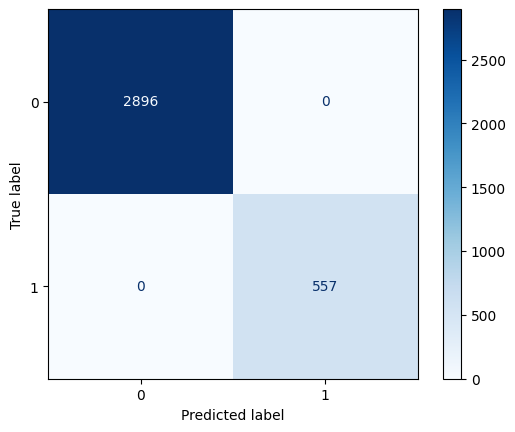

In [74]:
# Random Forest model results
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [75]:
#print accuracy score for random forest model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for random forest model
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 100.00%
Precision: 100.00%


In [76]:
#cross valaidation for Random Forest model
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

In [77]:
from sklearn.model_selection import cross_validate

# metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross validation 
results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())

Recall: 1.0
 F1-score: 1.0
Precision: 1.0
Accuracy: 1.0


In [78]:
# feature importances for Random Forest model
feature_importances= best_rf_model.feature_importances_
importance_df=pd.DataFrame({'feature':list(X_train.columns),'importance':feature_importances})
importance_df.sort_values(by='importance', ascending=False)

feature  importance
21          C3    0.183725
22          C4    0.161721
20         ESR    0.146649
23         CRP    0.144626
18      Esbach    0.098774
..         ...         ...
47  Anti_CBir1    0.000000
48  Anti_BP230    0.000000
49    Anti_tTG    0.000000
50         DGP    0.000000
75    Gender_1    0.000000

[76 rows x 2 columns]

In [79]:
# Parameters for XGBoost
params = {
    'max_depth': [10,12],  
    'learning_rate': [0.05],  
    'n_estimators': [100],  
    'subsample': [0.8],  
    'colsample_bytree': [1.0,1.2], 
    'min_child_weight': [1],  
    'gamma': [0.1]
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#scaling continuous_columns after split (use when data is not scaled before splitting into training and test sets)
#scaler_standard = StandardScaler()
#X_train[continuous_columns] = scaler_standard.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler_standard.transform(X_test[continuous_columns])

# XGBoost model initialization
xgb_model = XGBClassifier(reg_lambda=1, reg_alpha=1)

#using RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=100, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_xgb_model=random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

Best parameters:
{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}



Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2896
           1       1.00      1.00      1.00       557

    accuracy                           1.00      3453
   macro avg       1.00      1.00      1.00      3453
weighted avg       1.00      1.00      1.00      3453



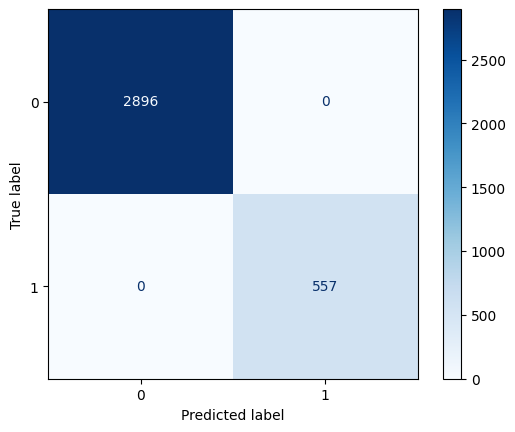

In [80]:
# XGBoost model results
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [81]:
#print accuracy score for XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for XGBoost model
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))


Accuracy: 100.00%
Precision: 100.00%


In [82]:
from sklearn.model_selection import cross_validate

# metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross validation 
results = cross_validate(xgb_model, X_train, y_train, cv=10, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())


Recall: 1.0
 F1-score: 1.0
Precision: 1.0
Accuracy: 1.0


In [83]:
# print the average score and standard deviation
print("Average score: {:.4f}".format(scores.mean()))
print("Standard deviation: {:.4f}".format(scores.std()))

Average score: 1.0000
Standard deviation: 0.0000


In [84]:
# feature importances for XGBoost model
feature_importances= best_xgb_model.feature_importances_
importance_df=pd.DataFrame({'feature':list(X_train.columns),'importance':feature_importances})
importance_df.sort_values(by='importance', ascending=False)

feature  importance
22                         C4    0.305332
21                         C3    0.195366
18                     Esbach    0.178814
20                        ESR    0.176323
23                        CRP    0.144096
..                        ...         ...
34                Weight_loss    0.000000
35    Rashes_and_skin_lesions    0.000000
36    Stiffness_in_the_joints    0.000000
37  Brittle_hair_or_hair_loss    0.000000
75                   Gender_1    0.000000

[76 rows x 2 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

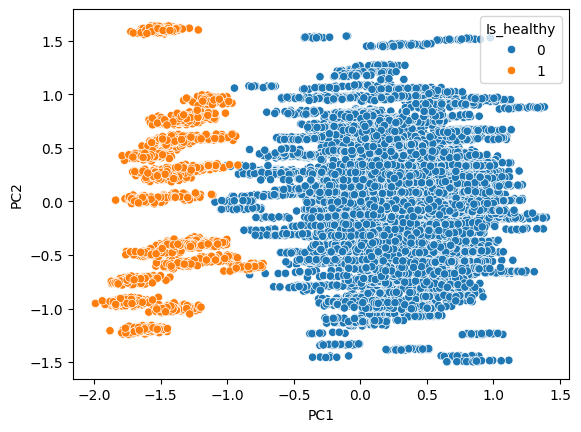

In [85]:
# checking whether classes are perfectly separable.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Is_healthy'] = y
sns.scatterplot(x='PC1', y='PC2', hue='Is_healthy', data=X_pca_df)


Preparation of models for all disease groups (only sick patients)

Skin and Mucosal Diseases-7

Musculoskeletal Diseases-4

Thyroid and Endocrine Diseases-8

Neurological Diseases-5

Immune System Diseases-1

Miscellaneous-3

Vascular Diseases-9

Kidney and Urinary Diseases-2

Gastrointestinal and Liver Diseases-0


In [86]:
# model for Diseases groups (removing all healthy patients)
df_sick=df_scaled.copy()
df_sick = df_sick[df_sick['Is_healthy'] != 1]

In [87]:
df_sick.shape

(11582, 79)

In [88]:
X = df_sick.drop(columns=['Diseases_group','Is_healthy'])
y = df_sick['Diseases_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# using SMOTE to balance classes
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#scaling continuous_columns after split (use when data is not scaled before splitting into training and test sets)
#scaler_standard = StandardScaler()
#X_train[continuous_columns] = scaler_standard.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler_standard.transform(X_test[continuous_columns])


# Class size
print("Class balance")
print(y_train.value_counts())

Class balance
Diseases_group
0    1867
5    1792
3    1733
4    1650
1    1644
Name: count, dtype: int64


In [89]:
#Random Forest model initialization
rf_model_sick = RandomForestClassifier(random_state=42)

# GridSearchCV parameters
#params = {
#    'criterion': ['gini', 'entropy', 'log_loss'],
#   'max_depth': [None, 2, 4, 6, 8, 10],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Best paramerts for model
params = {
    'criterion': ['log_loss'],
    'max_depth': [12],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

In [90]:
#using RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model_sick, param_distributions=params, n_iter=50, scoring='recall', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Using GridSearchCV
#grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
#grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_rf_sick_model=random_search.best_estimator_
y_pred = best_rf_sick_model.predict(X_test)

Best parameters:
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}



Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       623
           1       0.99      1.00      1.00       548
           3       0.99      0.99      0.99       577
           4       1.00      1.00      1.00       550
           5       0.98      0.96      0.97       598

    accuracy                           0.99      2896
   macro avg       0.99      0.99      0.99      2896
weighted avg       0.99      0.99      0.99      2896



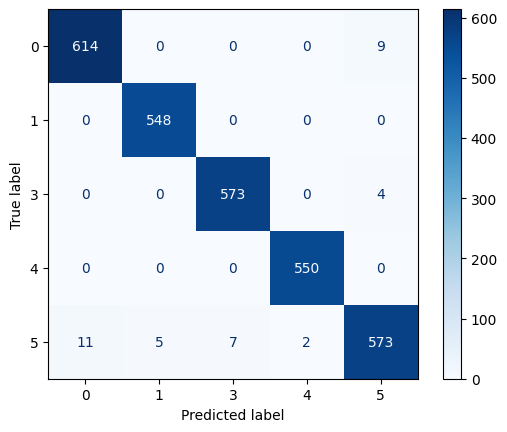

In [91]:
# Random Forest model results for all Diseases groups
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [92]:
#print accuracy score for random forest model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for random forest model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision * 100))


Accuracy: 98.69%
Precision: 98.71%


In [93]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Ddefine own scorers
precision_scorer = make_scorer(precision_score, zero_division=0,average='macro')
recall_scorer = make_scorer(recall_score, zero_division=0,average='macro')
f1_scorer = make_scorer(f1_score, zero_division=0,average='macro')

# metriks for validation
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}

# Cross validation
results = cross_validate(rf_model_sick, X_train, y_train, cv=cv, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())

Recall: 0.9886627023890199
 F1-score: 0.9885956266225137
Precision: 0.9886223916484209
Accuracy: 0.9882572001293928


In [95]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [96]:
from sklearn.preprocessing import LabelEncoder
X = df_sick.drop(columns=['Diseases_group','Is_healthy'])
y = df_sick['Diseases_group']


# Parameters for XGBoost
params = {
    'max_depth': [10],  
    'learning_rate': [0.05],  
    'n_estimators': [100],  
    'subsample': [0.8],  
    'colsample_bytree': [1.0,1.2], 
    'min_child_weight': [1],  
    'gamma': [0.1]
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Label Encoding for target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

largest_class_weight_coef = max(df_sick['Diseases_group'].value_counts().values)/df.shape[0]
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

#And then use it like this
#xg = XGBClassifier(n_estimators=1000, weights = weight, max_depth=20) reg_lambda=1, reg_alpha=1,weights=weight


# XGBoost model initialization
xgb_model_sick = XGBClassifier(reg_lambda=1, reg_alpha=1)

#using RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model_sick, param_distributions=params, n_iter=100, scoring='recall', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_xgb_model_sick=random_search.best_estimator_
y_pred = best_xgb_model_sick.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best parameters:
{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}



Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       623
           1       0.99      1.00      1.00       548
           2       0.99      0.99      0.99       577
           3       1.00      1.00      1.00       550
           4       0.98      0.96      0.97       598

    accuracy                           0.99      2896
   macro avg       0.99      0.99      0.99      2896
weighted avg       0.99      0.99      0.99      2896



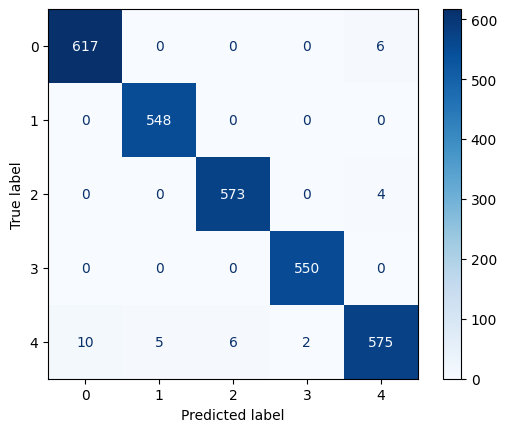

In [97]:
# XGBoost model results
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [98]:
#print accuracy score for XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for XGBoost model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision * 100))


Accuracy: 98.86%
Precision: 98.88%


In [99]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#define own scorers
precision_scorer = make_scorer(precision_score, zero_division=0,average='macro')
recall_scorer = make_scorer(recall_score, zero_division=0,average='macro')
f1_scorer = make_scorer(f1_score, zero_division=0,average='macro')

# metrics for validation 
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}

# Cross validation
results = cross_validate(xgb_model_sick, X_train, y_train, cv=cv, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())

Recall: 0.9884233734805017
 F1-score: 0.9883648001631415
Precision: 0.9884043689435946
Accuracy: 0.9880271831068075


Preparation of models for all disease groups (only sick patients)

Skin and Mucosal Diseases-7

Musculoskeletal Diseases-4

Thyroid and Endocrine Diseases-8

Neurological Diseases-5

Immune System Diseases-1

Miscellaneous-3

Vascular Diseases-9

Kidney and Urinary Diseases-2

Gastrointestinal and Liver Diseases-0


In [117]:
#creating a function to split df_sick to separate df for each diseases group

def create_disease_group_dfs(df_sick_00):
  
    # Słownik na DataFrame'y dla każdej grupy
    disease_group_dfs = {}

    # Iteracja po grupach chorobowych (0-5, z pominięciem 3)
    for i in range(6):
        if i == 2:
            continue  # Pomijamy grupę 3 (dedykowaną zdrowym pacjentom)
        
        # Tworzymy nowy DataFrame dla danej grupy
        df_group = df_sick_00.copy()
        df_group['Diseases_group'] = np.where(df_sick_00['Diseases_group'] == i, 1, 0)
        
        # Dodajemy DataFrame do słownika
        disease_group_dfs[f"df_sick_{i}"] = df_group

    return disease_group_dfs




In [118]:
df_sick_00=df_sick.copy()

#create_disease_group_dfs(df_sick_00)
disease_group_dfs = create_disease_group_dfs(df_sick_00)

In [119]:
df_sick.head()

Age  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  0.711864                  0.338983   0.478785    0.468340    0.497825   
1  0.576271                  0.338983   0.312755    0.105620    0.274469   
2  0.237288                  0.720339   0.351366    0.265439    0.166642   
3  0.033898                  0.355932   0.316616    0.378007    0.279370   
4  0.000000                  0.415254   0.185336    0.148701    0.530733   

        MCV       MCH      MCHC       RDW  Reticulocyte_Count  WBC_Count  \
0  0.897590  0.401667  0.796095  0.137646            0.907994   0.056835   
1  0.698461  0.370000  0.140017  0.308783            0.991999   0.121432   
2  0.183066  0.400000  0.842100  0.273222            0.339955   0.596144   
3  0.321954  0.111667  0.050006  0.693286            0.451962   0.603906   
4  0.494645  0.773333  0.354042  0.655503            0.647976   0.072484   

   Neutrophils  Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count  \
0     0.222123     0.648940   0.161498     0.857109   0.333333   0.757093   
1     0.049633     0.065634   0.013601     0.811986   0.949495   0.113334   
2     0.049633     0.191181   0.477346     0.884685   0.838384   0.029239   
3     0.101269     0.355772   0.162752     0.325655   0.313131   0.440828   
4     0.589584     0.928980   0.690419     0.325655   0.747475   0.493189   

        MPV  ANA    Esbach  MBL_Level       ESR        C3        C4       CRP  \
0  0.289738  1.0  0.309828   0.140000  0.357763  0.079174  0.207023  0.583803   
1  0.042254  0.0  0.895141   0.720000  0.526706  0.011438  0.163853  0.447252   
2  0.929577  0.0  0.472584   0.453333  0.455749  0.408034  0.173921  0.498794   
3  0.279678  1.0  0.479390   0.300000  0.395418  0.374585  0.108858  0.929223   
4  0.547284  0.0  0.932751   0.580000  0.507354  0.301304  0.195603  0.918332   

   AntidsDNA  AntiSm  Rheumatoid_factor  ACPA  Anti_TPO  Anti_Tg  Anti_SMA  \
0          1       0                  1     1         1        0         0   
1          1       1                  0     0         1        1         0   
2          0       1                  0     1         1        0         0   
3          1       0                  1     1         0        0         0   
4          1       0                  0     1         1        1         0   

   Low_grade_fever  Fatigue_or_chronic_tiredness  Dizziness  Weight_loss  \
0                0                             1          0            0   
1                1                             0          1            0   
2                1                             0          0            1   
3                0                             1          0            1   
4                0                             1          1            1   

   Rashes_and_skin_lesions  Stiffness_in_the_joints  \
0                        1                        0   
1                        1                        1   
2                        1                        1   
3                        0                        0   
4                        1                        0   

   Brittle_hair_or_hair_loss  Dry_eyes_and_or_mouth  General_unwell_feeling  \
0                          1                      1                       1   
1                          1                      1                       0   
2                          0                      1                       1   
3                          1                      0                       0   
4                          1                      0                       1   

   Joint_pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           0           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           1           0                           0          0         0   
4           1         

In [120]:
df_sick_0 = disease_group_dfs['df_sick_0']

df_sick_1 = disease_group_dfs['df_sick_1']


df_sick_3 = disease_group_dfs['df_sick_3']

df_sick_4 = disease_group_dfs['df_sick_4']

df_sick_5 = disease_group_dfs['df_sick_5']



In [121]:
# creating a fucntion to bulid multiple models based on Random Forest algoritm 

def train_evaluate_random_forest(df, target_column, exclude_columns=None, model_name="my_model_name"):
    """
    Function to train and evaluate a Random Forest classifier with randomized hyperparameter search.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the column to be predicted.
    - exclude_columns: A list of columns to exclude from the features (optional).
    - model_name: A name to uniquely identify the model (optional, default is "Random_Forest_Model").
    
    The function prints out:
    - The class balance.
    - Best hyperparameters for the Random Forest model.
    - The classification report, accuracy, precision, recall, and F1 scores.
    """
    # Prepare features and target
    if exclude_columns is None:
        exclude_columns = []
    X = df.drop(columns=[target_column] + exclude_columns)
    y = df[target_column]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Class size
    print(f"Class balance for model '{model_name}':")
    print(y_train.value_counts())

    # Random Forest model initialization
    
    rf_model = RandomForestClassifier(random_state=42)
   

    # Hyperparameters for RandomizedSearchCV
    params = {
        'criterion': ['log_loss'],
        'max_depth': [12],
        'min_samples_split': [10],
        'min_samples_leaf': [2]
    }

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, scoring='recall', cv=5, random_state=42)
    random_search.fit(X_train, y_train)

    # Best parameters for the model
    print(f"\nBest parameters for model '{model_name}':")
    print(random_search.best_params_)

    # Prediction for the test set
    best_rf_model_new = random_search.best_estimator_
    y_pred = best_rf_model_new.predict(X_test)


    # Classification report
    print(f"\nClassification report for model '{model_name}':")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for model '{model_name}': {accuracy * 100:.2f}%")

    # Precision score
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision for model '{model_name}': {precision* 100:.2f}%")

    # StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Define custom scorers
    precision_scorer = make_scorer(precision_score, zero_division=0, average='macro')
    recall_scorer = make_scorer(recall_score, zero_division=0, average='macro')
    f1_scorer = make_scorer(f1_score, zero_division=0, average='macro')

    # Scoring metrics for validation
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1': f1_scorer
    }

    # Cross-validation results
    results = cross_validate(rf_model, X_train, y_train, cv=cv, scoring=scoring)

    # Print results (from the most important to the least important)
    print(f"Recall for model (train data) '{model_name}':", results['test_recall'].mean())
    print(f"F1-score for model (train data)'{model_name}':", results['test_f1'].mean())
    print(f"Precision for model (train data)'{model_name}':", results['test_precision'].mean())
    print(f"Accuracy for model (train data)'{model_name}':", results['test_accuracy'].mean())

    return results, best_rf_model_new

Preaparing results for each model for diseases group based on created function

Class balance for model 'Autoimmune orchitis':
Diseases_group
0    6819
1    1867
Name: count, dtype: int64

Best parameters for model 'Autoimmune orchitis':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'Autoimmune orchitis':
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       0.99      0.99      0.99       623

    accuracy                           0.99      2896
   macro avg       0.99      0.99      0.99      2896
weighted avg       0.99      0.99      0.99      2896

Accuracy for model 'Autoimmune orchitis': 99.41%
Precision for model 'Autoimmune orchitis': 99.10%
Recall for model (train data) 'Autoimmune orchitis': 0.990736264922081
F1-score for model (train data)'Autoimmune orchitis': 0.9897900667661453
Precision for model (train data)'Autoimmune orchitis': 0.9888841817725735
Accuracy for model (train data)'Autoimmune orchitis

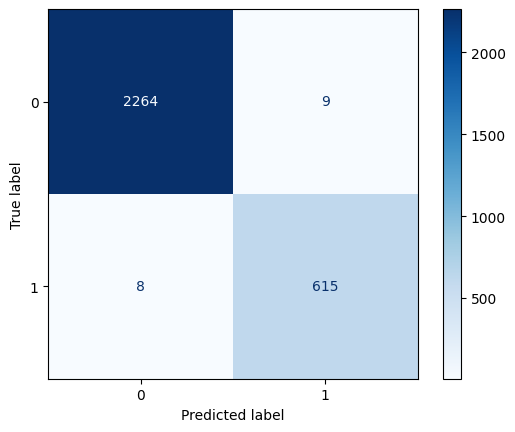

In [122]:
results_0, best_rf_model_new_0 = train_evaluate_random_forest(df_sick_0, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='Autoimmune orchitis')

Class balance for model 'Graves disease':
Diseases_group
0    7042
1    1644
Name: count, dtype: int64

Best parameters for model 'Graves disease':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'Graves disease':
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2348
           1       1.00      1.00      1.00       548

    accuracy                           1.00      2896
   macro avg       1.00      1.00      1.00      2896
weighted avg       1.00      1.00      1.00      2896

Accuracy for model 'Graves disease': 99.93%
Precision for model 'Graves disease': 99.82%
Recall for model (train data) 'Graves disease': 0.9992709340747904
F1-score for model (train data)'Graves disease': 0.9986902247759396
Precision for model (train data)'Graves disease': 0.9981162719058052
Accuracy for model (train data)'Graves disease': 0.9991940786857079


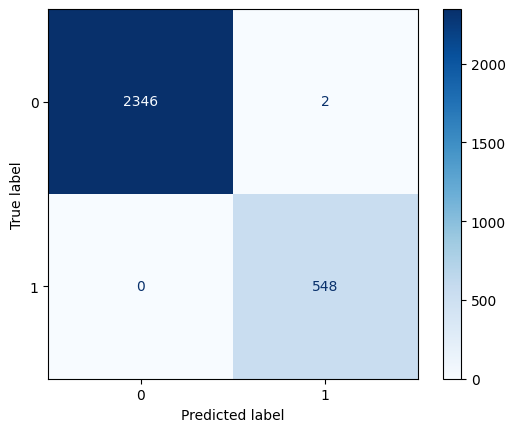

In [123]:
results_1, best_rf_model_new_1 = train_evaluate_random_forest(df_sick_1, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='Graves disease')

Class balance for model 'Rheumatoid arthritis':
Diseases_group
0    6954
1    1732
Name: count, dtype: int64

Best parameters for model 'Rheumatoid arthritis':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'Rheumatoid arthritis':
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       0.99      1.00      0.99       578

    accuracy                           1.00      2896
   macro avg       0.99      1.00      1.00      2896
weighted avg       1.00      1.00      1.00      2896

Accuracy for model 'Rheumatoid arthritis': 99.69%
Precision for model 'Rheumatoid arthritis': 99.29%
Recall for model (train data) 'Rheumatoid arthritis': 0.9935141442357377
F1-score for model (train data)'Rheumatoid arthritis': 0.991923363090384
Precision for model (train data)'Rheumatoid arthritis': 0.9903893630175972
Accuracy for model (train data)'Rheumatoid 

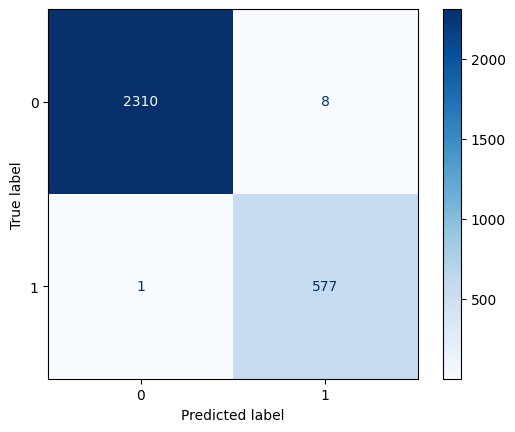

In [124]:
results_3, best_rf_model_new_3 =train_evaluate_random_forest(df_sick_3, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='Rheumatoid arthritis')

Class balance for model 'Sjögren syndrome':
Diseases_group
0    7036
1    1650
Name: count, dtype: int64

Best parameters for model 'Sjögren syndrome':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'Sjögren syndrome':
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2346
           1       1.00      1.00      1.00       550

    accuracy                           1.00      2896
   macro avg       1.00      1.00      1.00      2896
weighted avg       1.00      1.00      1.00      2896

Accuracy for model 'Sjögren syndrome': 99.93%
Precision for model 'Sjögren syndrome': 99.82%
Recall for model (train data) 'Sjögren syndrome': 0.999857853517393
F1-score for model (train data)'Sjögren syndrome': 0.9996267614050618
Precision for model (train data)'Sjögren syndrome': 0.9993975903614458
Accuracy for model (train data)'Sjögren syndrome': 0.999769717828109


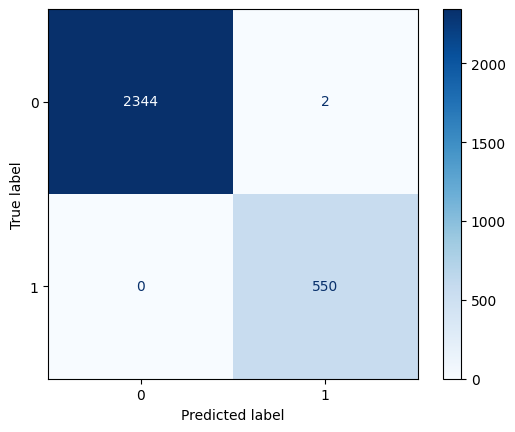

In [125]:
results_4, best_rf_model_new_4 =train_evaluate_random_forest(df_sick_4, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='Sjögren syndrome')

Class balance for model 'Systemic lupus erythematosus (SLE)':
Diseases_group
0    6894
1    1792
Name: count, dtype: int64

Best parameters for model 'Systemic lupus erythematosus (SLE)':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'Systemic lupus erythematosus (SLE)':
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2298
           1       1.00      0.34      0.51       598

    accuracy                           0.86      2896
   macro avg       0.93      0.67      0.71      2896
weighted avg       0.88      0.86      0.84      2896

Accuracy for model 'Systemic lupus erythematosus (SLE)': 86.36%
Precision for model 'Systemic lupus erythematosus (SLE)': 92.67%
Recall for model (train data) 'Systemic lupus erythematosus (SLE)': 0.979047215425188
F1-score for model (train data)'Systemic lupus erythematosus (SLE)': 0.9821358642477321
Precision for model 

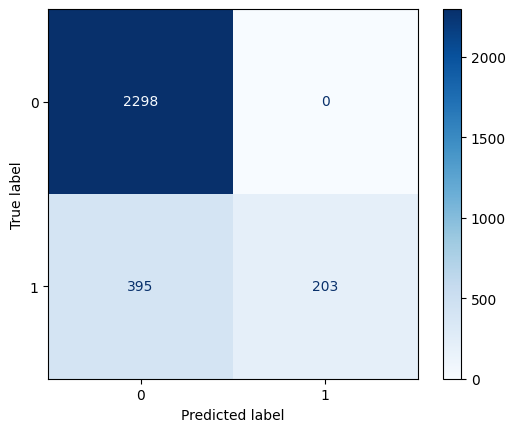

In [126]:
results_5, best_rf_model_new_5 = train_evaluate_random_forest(df_sick_5, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='Systemic lupus erythematosus (SLE)')

In [128]:
# feature importances for df_sick_5
feature_importances= best_rf_model_new_5.feature_importances_
importance_df=pd.DataFrame({'feature':list(X_train.columns),'importance':feature_importances})
importance_df.sort_values(by='importance', ascending=False)

feature  importance
11              Neutrophils    0.055480
13                Monocytes    0.045570
6                       MCH    0.038908
0                       Age    0.037241
14              Eosinophils    0.036641
..                      ...         ...
57        Anti_desmoglein_3    0.000081
47              Anti_Ro_SSA    0.000069
69                    pANCA    0.000047
50                 Anti_tTG    0.000000
74  Progesterone_antibodies    0.000000

[77 rows x 2 columns]

In [134]:
from imblearn.under_sampling import RandomUnderSampler

In [141]:
# creating a fucntion to bulid multiple models based on Random Forest algoritm 

def train_evaluate_random_forest_rus(df, target_column, exclude_columns=None, model_name="my_model_name"):
    """
    Function to train and evaluate a Random Forest classifier with randomized hyperparameter search.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the column to be predicted.
    - exclude_columns: A list of columns to exclude from the features (optional).
    - model_name: A name to uniquely identify the model (optional, default is "Random_Forest_Model").
    
    The function prints out:
    - The class balance.
    - Best hyperparameters for the Random Forest model.
    - The classification report, accuracy, precision, recall, and F1 scores.
    """
    # Prepare features and target
    if exclude_columns is None:
        exclude_columns = []
    X = df.drop(columns=[target_column] + exclude_columns)
    y = df[target_column]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    #RandomUnderSampler
    rus=RandomUnderSampler(random_state=101)
    X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
  

    # Class size
    print(f"Class balance for model '{model_name}':")
    print(y_train_rus.value_counts())

    # Random Forest model initialization
    
    rf_model = RandomForestClassifier(random_state=42)
   

    # Hyperparameters for RandomizedSearchCV
    params = {
        'criterion': ['log_loss'],
        'max_depth': [12],
        'min_samples_split': [10],
        'min_samples_leaf': [2]
    }

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, scoring='recall', cv=5, random_state=42)
    random_search.fit(X_train_rus, y_train_rus)

    # Best parameters for the model
    print(f"\nBest parameters for model '{model_name}':")
    print(random_search.best_params_)

    # Prediction for the test set
    best_rf_model_new = random_search.best_estimator_
    y_pred = best_rf_model_new.predict(X_test)

    # Classification report
    print(f"\nClassification report for model '{model_name}':")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for model '{model_name}': {accuracy * 100:.2f}%")

    # Precision score
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision for model '{model_name}': {precision* 100:.2f}%")

    # StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Define custom scorers
    precision_scorer = make_scorer(precision_score, zero_division=0, average='macro')
    recall_scorer = make_scorer(recall_score, zero_division=0, average='macro')
    f1_scorer = make_scorer(f1_score, zero_division=0, average='macro')

    # Scoring metrics for validation
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1': f1_scorer
    }

    # Cross-validation results
    results = cross_validate(rf_model, X_train_rus, y_train_rus, cv=cv, scoring=scoring)

    # Print results (from the most important to the least important)
    print(f"Recall for model (train data) '{model_name}':", results['test_recall'].mean())
    print(f"F1-score for model (train data)'{model_name}':", results['test_f1'].mean())
    print(f"Precision for model (train data)'{model_name}':", results['test_precision'].mean())
    print(f"Accuracy for model (train data)'{model_name}':", results['test_accuracy'].mean())

    return results, best_rf_model_new

In [ ]:
train_evaluate_random_forest_rus(df_sick_0, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_gastrointestinal_and_liver')


In [ ]:
train_evaluate_random_forest_rus(df_sick_1, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_immune_system')


In [ ]:
train_evaluate_random_forest_rus(df_sick_3, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_kidney_and_urinary')


In [ ]:
train_evaluate_random_forest_rus(df_sick_4, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_musculoskeletal')


Class balance for model 'Systemic lupus erythematosus (SLE)':
Diseases_group
0    1792
1    1792
Name: count, dtype: int64

Best parameters for model 'Systemic lupus erythematosus (SLE)':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'Systemic lupus erythematosus (SLE)':
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2298
           1       0.93      0.98      0.96       598

    accuracy                           0.98      2896
   macro avg       0.96      0.98      0.97      2896
weighted avg       0.98      0.98      0.98      2896

Accuracy for model 'Systemic lupus erythematosus (SLE)': 98.17%
Precision for model 'Systemic lupus erythematosus (SLE)': 96.42%
Recall for model (train data) 'Systemic lupus erythematosus (SLE)': 0.9854934823091248
F1-score for model (train data)'Systemic lupus erythematosus (SLE)': 0.9854895099073616
Precision for model

({'fit_time': array([0.42782784, 0.45215511, 0.50988698, 0.43062592, 0.44137812,
         0.43620777, 0.42407775, 0.43004179, 0.42724204, 0.43615103]),
  'score_time': array([0.01635528, 0.01634097, 0.01644993, 0.01568294, 0.0156951 ,
         0.01582813, 0.01618505, 0.01570725, 0.01588297, 0.01579905]),
  'test_accuracy': array([0.98885794, 0.98607242, 0.98328691, 0.98607242, 0.99162011,
         0.98324022, 0.97765363, 0.99162011, 0.98603352, 0.98044693]),
  'test_precision': array([0.98890372, 0.98618613, 0.9835559 , 0.98618613, 0.99163546,
         0.98330056, 0.97789227, 0.99163546, 0.98604869, 0.98058192]),
  'test_recall': array([0.98887337, 0.98609559, 0.98325574, 0.98609559, 0.99162011,
         0.98324022, 0.97765363, 0.99162011, 0.98603352, 0.98044693]),
  'test_f1': array([0.98885785, 0.98607199, 0.98328367, 0.98607199, 0.99162005,
         0.9832397 , 0.97765084, 0.99162005, 0.98603341, 0.98044555])},
 RandomForestClassifier(criterion='log_loss', max_depth=12, min_samples_

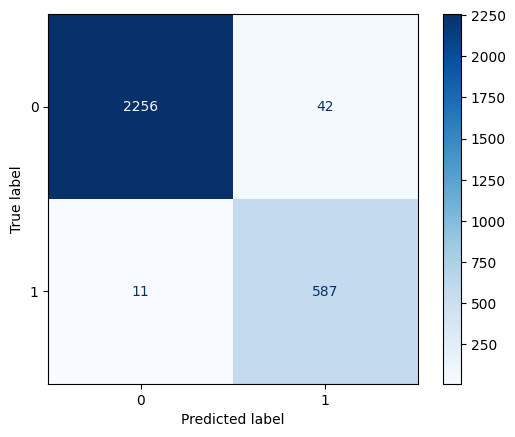

In [142]:
train_evaluate_random_forest_rus(df_sick_5, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='Systemic lupus erythematosus (SLE)')
